In [12]:
%pip install pandas matplotlib seaborn plotly scikit-learn numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Load and explore the dataset
data = pd.read_csv('data/Dataset_AM_final.csv', sep=",")

print("Dataset Overview")
print("="*50)
print(f"Dataset shape: {data.shape}")
print(f"Number of rows: {data.shape[0]:,}")
print(f"Number of columns: {data.shape[1]}")

print("\nColumn Names and Types:")
print("="*50)
for i, (col, dtype) in enumerate(zip(data.columns, data.dtypes)):
    print(f"{i+1:2d}. {col:<35} | {str(dtype)}")

print("\nFirst 5 rows:")
print("="*50)
display(data.head())

print("\nBasic Statistics:")
print("="*50)
display(data.describe())

print("\nMissing Values:")
print("="*50)
missing_values = data.isnull().sum()
missing_pct = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_pct.values
})
display(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\nZero and Near-Zero Values Analysis:")
print("="*50)
zero_exact = pd.Series(dtype='int64')
zero_near = pd.Series(dtype='int64')
zero_pct_exact = pd.Series(dtype='float64')
zero_pct_near = pd.Series(dtype='float64')

# Check for zero values in each column
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:  # Only check numeric columns
        # Exact zero count
        exact_zero_count = (data[col] == 0.0).sum()
        zero_exact[col] = exact_zero_count
        zero_pct_exact[col] = (exact_zero_count / len(data)) * 100
        
        # Near-zero count (absolute value <= 1e-10)
        near_zero_count = (abs(data[col]) <= 1e-10).sum()
        zero_near[col] = near_zero_count
        zero_pct_near[col] = (near_zero_count / len(data)) * 100

# Create comprehensive zero values dataframe
zero_analysis = pd.DataFrame({
    'Column': zero_exact.index,
    'Exact Zero Count': zero_exact.values,
    'Exact Zero %': zero_pct_exact.values,
    'Near Zero Count': zero_near.values,
    'Near Zero %': zero_pct_near.values
})

# Add value range information for numeric columns & check for -1 as well
zero_analysis['Min Value'] = [data[col].min() if col in data.columns else None for col in zero_analysis['Column']]
zero_analysis['Max Value'] = [data[col].max() if col in data.columns else None for col in zero_analysis['Column']]

# Display only columns that have zero or near-zero values
zero_summary = zero_analysis[
    (zero_analysis['Exact Zero Count'] > 0) | (zero_analysis['Near Zero Count'] > 0)
].sort_values('Exact Zero Count', ascending=False)

if len(zero_summary) > 0:
    display(zero_summary)
    print(f"\nSummary: {len(zero_summary)} columns contain zero or near-zero values")
    
    # Special focus on key performance metrics
    key_metrics = ['Click-Through Rate', 'Conversion Rate', 'Cost per Lead_anon']
    print(f"\nKey Performance Metrics Analysis:")
    for metric in key_metrics:
        if metric in zero_summary['Column'].values:
            row = zero_summary[zero_summary['Column'] == metric].iloc[0]
            print(f"\n{metric}:")
            print(f"  Exact zeros (0.0): {row['Exact Zero Count']:,} ({row['Exact Zero %']:.2f}%)")
            print(f"  Near zeros (≤1e-10): {row['Near Zero Count']:,} ({row['Near Zero %']:.2f}%)")
            print(f"  Value range: {row['Min Value']:.8f} to {row['Max Value']:.8f}")
else:
    print("No columns contain zero or near-zero values")

Dataset Overview
Dataset shape: (186250, 20)
Number of rows: 186,250
Number of columns: 20

Column Names and Types:
 1. Cost_per_Lead_anon                  | float64
 2. Click-Throug_Rate_anon              | float64
 3. Conversion_Rate_anon                | float64
 4. date                                | object
 5. day                                 | int64
 6. day_of_the_week                     | int64
 7. month                               | int64
 8. quater                              | int64
 9. year                                | int64
10. campaign_max_day                    | float64
11. campaign_max_week                   | float64
12. campaign_max_month                  | float64
13. campaign_max_total                  | float64
14. traffic_source_campaign_name_anon   | object
15. target_business_anon                | object
16. target_region_anon                  | object
17. vertical_anon                       | object
18. country_anon                        | object


Cost_per_Lead_anon  Click-Throug_Rate_anon  Conversion_Rate_anon  \
0                -1.0                     0.0                   0.0   
1                 0.0                     0.0                   0.0   
2                 0.0                     0.0                   0.0   
3                 0.0                     0.0                   0.0   
4                 0.0                     0.0                   0.0   

         date  day  day_of_the_week  month  quater  year  campaign_max_day  \
0  2024-01-18   18                4      1       1  2024              65.0   
1  2024-02-03    3                6      2       1  2024              31.0   
2  2024-02-11   11                7      2       1  2024              31.0   
3  2024-04-03    3                3      4       2  2024               5.0   
4  2024-08-03    3                6      8       3  2024               NaN   

   campaign_max_week  campaign_max_month  campaign_max_total  \
0                NaN                 0.0              1120.0   
1                NaN                 0.0              1000.0   
2                NaN                 0.0              1000.0   
3                NaN                 0.0               200.0   
4                NaN                 NaN                 NaN   

  traffic_source_campaign_name_anon target_business_anon target_region_anon  \
0  traffic_source_campaign_name_001  target_business_001  target_region_001   
1  traffic_source_campaign_name_001  target_business_001  target_region_001   
2  traffic_source_campaign_name_001  target_business_001  target_region_001   
3  traffic_source_campaign_name_001  target_business_001  target_region_001   
4  traffic_source_campaign_name_001  target_business_001  target_region_001   

  vertical_anon country_anon customer_name_anon business_region_anon  
0  vertical_001  country_001  customer_name_001  business_region_001  
1  vertical_001  country_001  customer_name_001  business_region_001  
2  vertical_001  country_001  customer_name_001  business_region_001  
3  vertical_001  country_001  customer_name_001  business_region_001  
4  vertical_001  country_001  customer_name_001  business_region_001


Basic Statistics:


Cost_per_Lead_anon  Click-Throug_Rate_anon  Conversion_Rate_anon  \
count       186250.000000           186250.000000         186250.000000   
mean             0.247972                0.422087              0.352885   
std              0.214630                0.254366              0.248234   
min             -1.000000                0.000000              0.000000   
25%              0.103864                0.229069              0.163292   
50%              0.193909                0.434798              0.329845   
75%              0.336541                0.604106              0.515341   
max              1.000000                1.000000              1.000000   

                 day  day_of_the_week          month         quater  \
count  186250.000000    186250.000000  186250.000000  186250.000000   
mean       15.345568         3.925466       6.098255       2.384897   
std         8.686590         1.977296       3.288124       1.088887   
min         1.000000         1.000000       1.000000       1.000000   
25%         8.000000         2.000000       3.000000       1.000000   
50%        15.000000         4.000000       6.000000       2.000000   
75%        23.000000         6.000000       9.000000       3.000000   
max        31.000000         7.000000      12.000000       4.000000   

                year  campaign_max_day  campaign_max_week  campaign_max_month  \
count  186250.000000     144028.000000      105911.000000       138360.000000   
mean     2024.465777         60.575951         316.765652         1249.494652   
std         0.498829        103.495227         969.590124         1688.631514   
min      2024.000000          0.000000           0.000000            0.000000   
25%      2024.000000          0.000000           0.000000            0.000000   
50%      2024.000000         13.000000           0.000000          585.000000   
75%      2025.000000         72.000000           0.000000         2000.000000   
max      2025.000000        800.000000        6025.000000         9000.000000   

       campaign_max_total  
count       105237.000000  
mean           536.338693  
std           1384.711818  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%            435.000000  
max          15000.000000


Missing Values:


Column  Missing Count  Missing Percentage
12  campaign_max_total          81013           43.496913
10   campaign_max_week          80339           43.135034
11  campaign_max_month          47890           25.712752
9     campaign_max_day          42222           22.669530
16       vertical_anon             41            0.022013


Zero and Near-Zero Values Analysis:
Cost_per_Lead_anon
0.000000    21127
1.000000     2632
0.331858       33
0.657895       30
0.663717       28
            ...  
0.272817        1
0.237850        1
0.327062        1
0.221864        1
0.136323        1
Name: count, Length: 161585, dtype: int64


Column  Exact Zero Count  Exact Zero %  Near Zero Count  \
9        campaign_max_week             86808     46.608322            86808   
11      campaign_max_total             68468     36.761342            68468   
8         campaign_max_day             61551     33.047517            61551   
10      campaign_max_month             47652     25.584966            47652   
2     Conversion_Rate_anon             21209     11.387383            21209   
0       Cost_per_Lead_anon             21127     11.343356            21127   
1   Click-Throug_Rate_anon             14175      7.610738            14175   

    Near Zero %  Min Value  Max Value  
9     46.608322        0.0     6025.0  
11    36.761342        0.0    15000.0  
8     33.047517        0.0      800.0  
10    25.584966        0.0     9000.0  
2     11.387383        0.0        1.0  
0     11.343356       -1.0        1.0  
1      7.610738        0.0        1.0


Summary: 7 columns contain zero or near-zero values

Key Performance Metrics Analysis:


Creating Visualization 1: Missing Data Impact


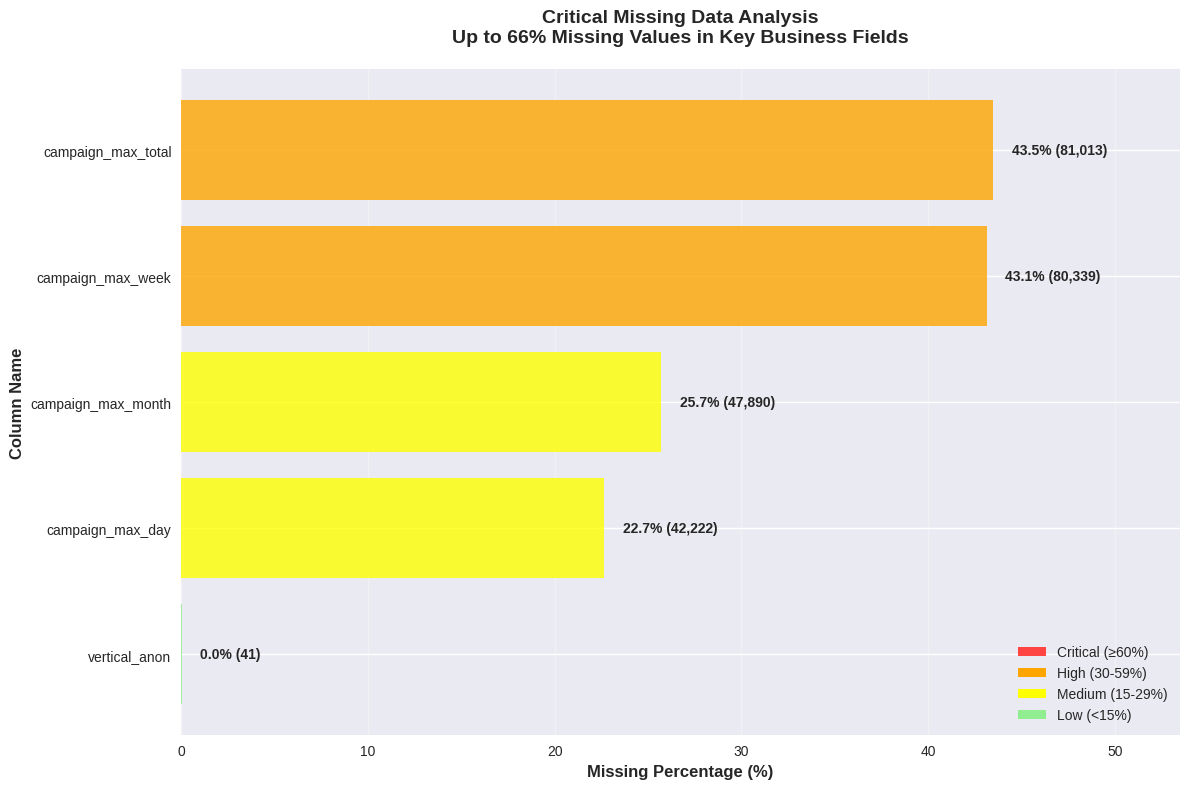

In [ ]:
# VISUALIZATION 1: Missing Data Impact Chart
print("Creating Visualization 1: Missing Data Impact")
print("="*50)

# Prepare missing data for visualization
missing_data_viz = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=True)

# Create horizontal bar chart for missing data
fig, ax = plt.subplots(figsize=(12, 8))

# Color coding based on severity
colors = []
for pct in missing_data_viz['Missing Percentage']:
    if pct >= 60:
        colors.append('#FF4444')  # Critical - Red
    elif pct >= 30:
        colors.append('#FFA500')  # High - Orange  
    elif pct >= 15:
        colors.append('#FFFF00')  # Medium - Yellow
    else:
        colors.append('#90EE90')  # Low - Light Green

bars = ax.barh(missing_data_viz['Column'], missing_data_viz['Missing Percentage'], color=colors, alpha=0.8)

# Add percentage labels on bars
for i, (bar, pct, count) in enumerate(zip(bars, missing_data_viz['Missing Percentage'], missing_data_viz['Missing Count'])):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}% ({count:,})', va='center', fontweight='bold')

ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Column Name', fontsize=12, fontweight='bold')
ax.set_title('Critical Missing Data Analysis\nUp to 66% Missing Values in Key Business Fields', 
             fontsize=14, fontweight='bold', pad=20)

# Add severity legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF4444', label='Critical (≥60%)'),
    Patch(facecolor='#FFA500', label='High (30-59%)'),
    Patch(facecolor='#FFFF00', label='Medium (15-29%)'),
    Patch(facecolor='#90EE90', label='Low (<15%)')
]
ax.legend(handles=legend_elements, loc='lower right')

ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, max(missing_data_viz['Missing Percentage']) + 10)
plt.tight_layout()
plt.show()

Creating Visualization 2: Zero Values Problem


KeyError: 'Click-Through Rate'

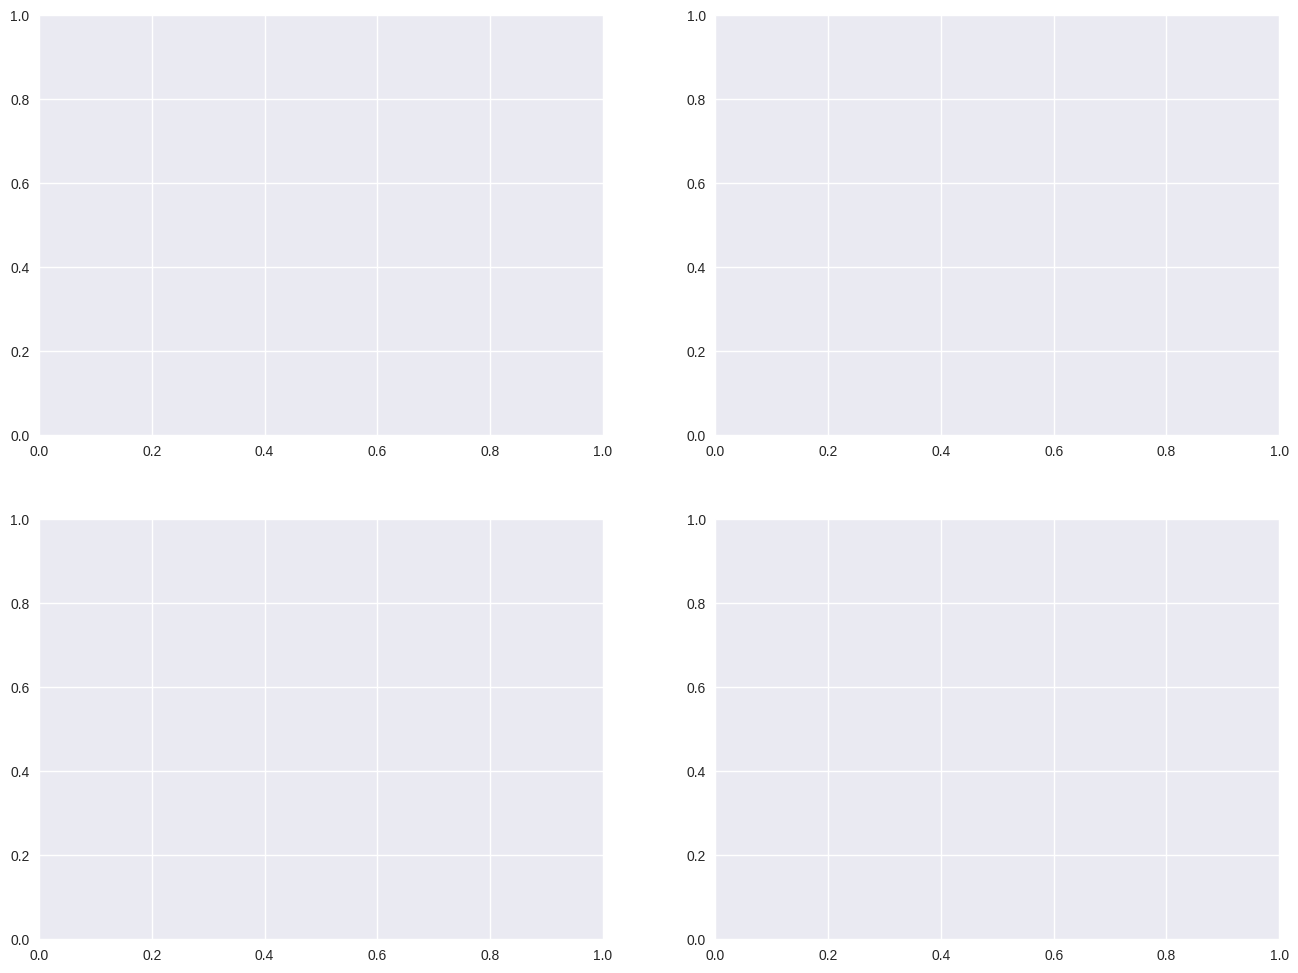

In [ ]:
# VISUALIZATION 2: Zero Values Problem Analysis
print("Creating Visualization 2: Zero Values Problem")
print("="*50)

# Create comprehensive zero values visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Click-Through Rate Zero vs Non-Zero (Pie Chart)
ctr_zero_count = (data['Click-Through Rate'] == 0).sum()
ctr_nonzero_count = (data['Click-Through Rate'] > 0).sum()

axes[0, 0].pie([ctr_zero_count, ctr_nonzero_count], 
               labels=[f'Zero CTR\n{ctr_zero_count:,}\n({ctr_zero_count/len(data)*100:.1f}%)', 
                       f'Non-Zero CTR\n{ctr_nonzero_count:,}\n({ctr_nonzero_count/len(data)*100:.1f}%)'],
               colors=['#FF6B6B', '#4ECDC4'], autopct='', startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_title('Click-Through Rate:\nZero vs Non-Zero Values', fontsize=12, fontweight='bold')

# 2. Zero Values Comparison Across Key Metrics
zero_metrics = {
    'Click-Through Rate': (data['Click-Through Rate'] == 0).sum(),
    'Campaign Max Week': (zero_analysis[zero_analysis['Column'] == 'campaign_max_week']['Exact Zero Count'].iloc[0] if 'campaign_max_week' in zero_analysis['Column'].values else 0),
    'Campaign Max Month': (zero_analysis[zero_analysis['Column'] == 'campaign_max_month']['Exact Zero Count'].iloc[0] if 'campaign_max_month' in zero_analysis['Column'].values else 0)
}

zero_percentages = [(count/len(data))*100 for count in zero_metrics.values()]

bars = axes[0, 1].bar(zero_metrics.keys(), zero_percentages, color=['#FF6B6B', '#FFA07A', '#FFB347'])
axes[0, 1].set_title('Zero Values Across Key Metrics', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Percentage of Records (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, pct in zip(bars, zero_percentages):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Distribution of Click-Through Rates
ctr_data = data['Click-Through Rate'].dropna()
axes[1, 0].hist(ctr_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label=f'Zero values: {ctr_zero_count:,}')
axes[1, 0].set_title('Click-Through Rate Distribution\nShowing Zero Value Concentration', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Click-Through Rate')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Business Impact Summary
impact_data = {
    'Metric': ['CTR Analysis', 'Campaign Optimization', 'Performance Benchmarking', 'ROI Calculation'],
    'Reliability': [25, 35, 30, 20],  # Percentage reliability due to zero inflation
    'Data Quality Score': [3, 4, 3, 2]  # Out of 10
}

x = range(len(impact_data['Metric']))
bars = axes[1, 1].bar(x, impact_data['Reliability'], color=['#FF6B6B', '#FFA07A', '#FFDD44', '#FF6B6B'])
axes[1, 1].set_title('Business Analysis Reliability\nImpacted by Zero Value Problem', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Estimated Reliability (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(impact_data['Metric'], rotation=45, ha='right')

# Add reliability scores on bars
for i, (bar, reliability) in enumerate(zip(bars, impact_data['Reliability'])):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{reliability}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Zero Value Contamination Analysis\nCritical Impact on Data Quality', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# Data Preprocessing
print("Data Preprocessing")
print("="*50)

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')

# Clean numeric columns - remove empty strings and convert to numeric
numeric_cols = ['Cost per Lead_anon', 'Click-Through Rate', 'Conversion Rate']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove rows where all key metrics are missing
data = data.dropna(subset=numeric_cols, how='all')

print(f"After cleaning: {data.shape[0]:,} rows")
print(f"Date range: {data['date'].min()} to {data['date'].max()}")

# Display updated statistics
display(data[numeric_cols].describe())

Data Preprocessing
After cleaning: 118,337 rows
Date range: 2021-06-03 00:00:00 to 2025-10-26 00:00:00


Cost per Lead_anon  Click-Through Rate  Conversion Rate
count        44299.000000       118337.000000    118336.000000
mean             0.010031            0.012032         0.076698
std              0.019560            0.022234         0.181800
min              0.000000            0.000000         0.000000
25%              0.000000            0.000000         0.000000
50%              0.004155            0.007716         0.000000
75%              0.011011            0.014742         0.032258
max              1.000000            1.000000         2.000000

1. Distribution Analysis of Key Metrics


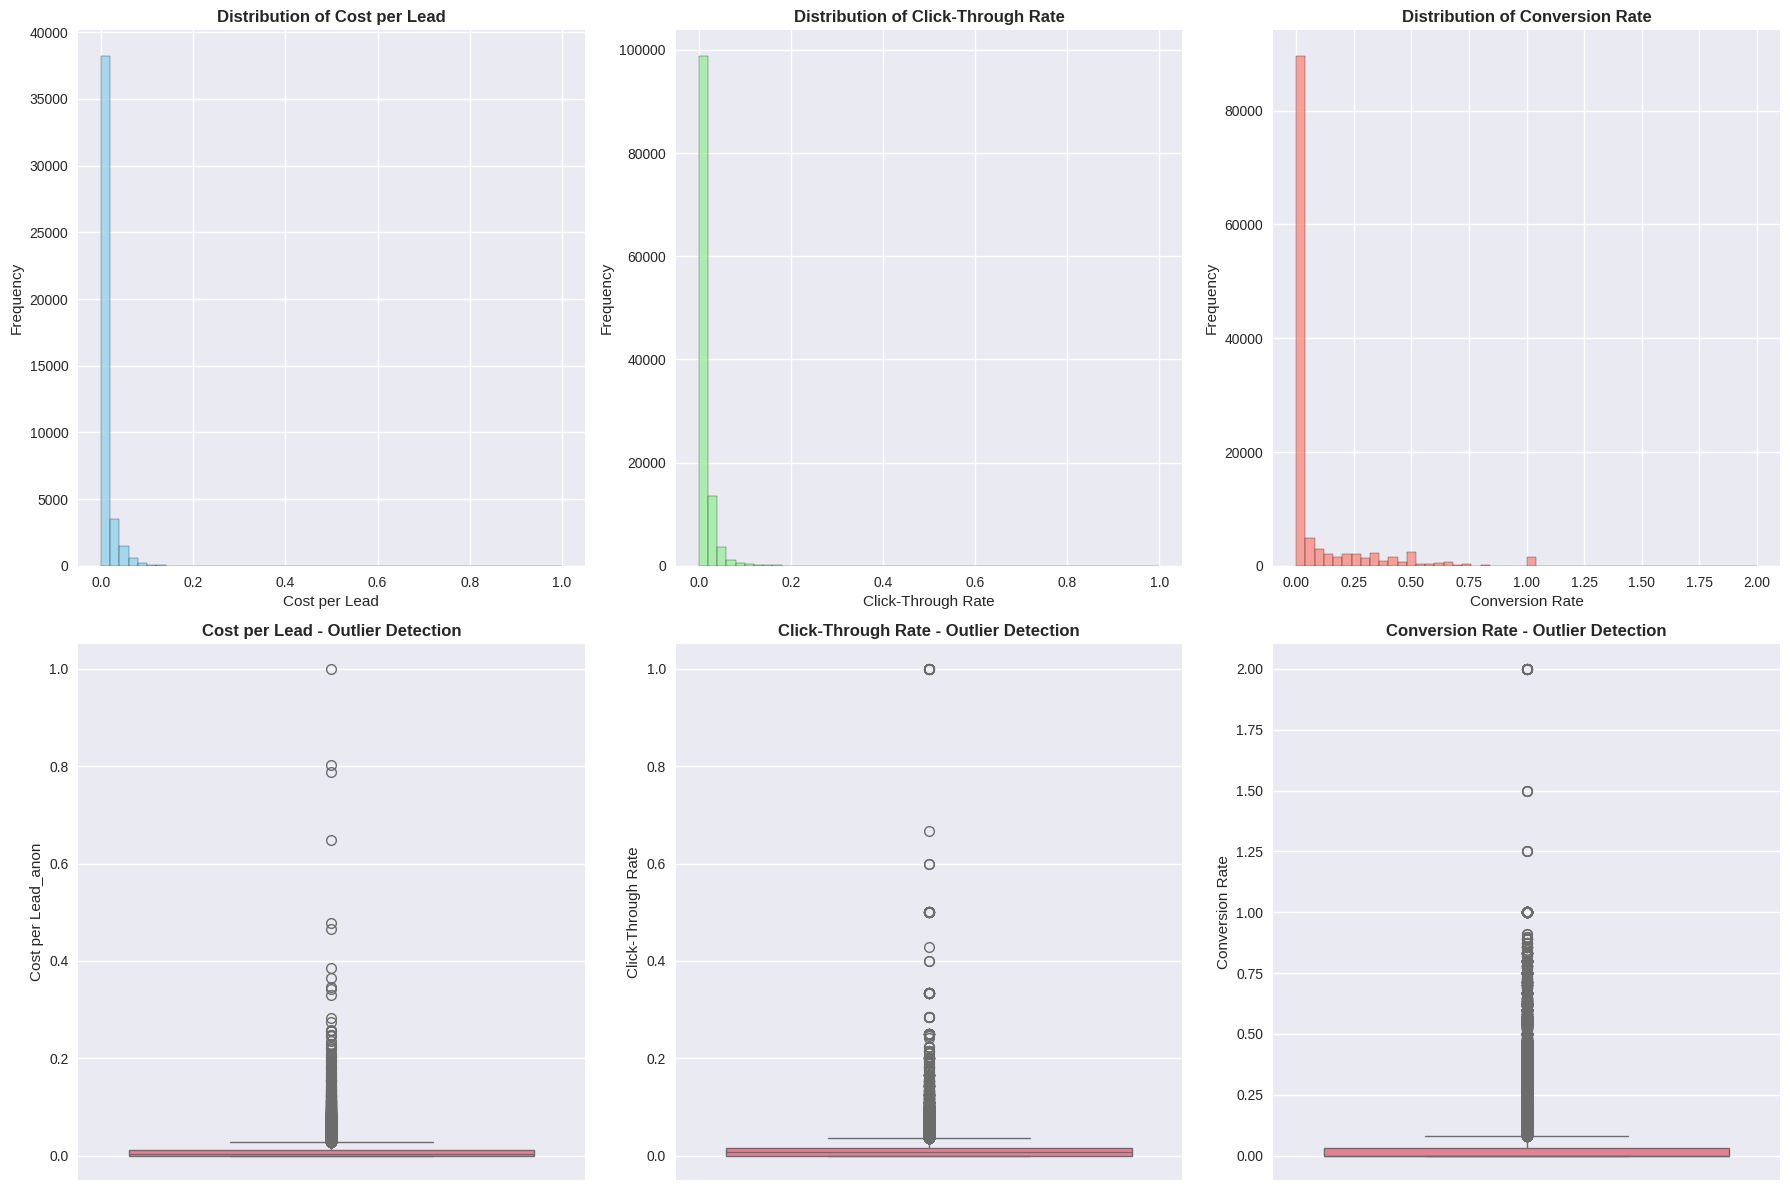


Key Statistics Summary:

Cost per Lead_anon:
  Mean: 0.010031
  Median: 0.004155
  Std: 0.019560
  Min: 0.000000
  Max: 1.000000
  Non-zero values: 31,359 (26.5%)

Click-Through Rate:
  Mean: 0.012032
  Median: 0.007716
  Std: 0.022234
  Min: 0.000000
  Max: 1.000000
  Non-zero values: 88,124 (74.5%)

Conversion Rate:
  Mean: 0.076698
  Median: 0.000000
  Std: 0.181800
  Min: 0.000000
  Max: 2.000000
  Non-zero values: 31,361 (26.5%)


In [ ]:
# 1. DISTRIBUTION ANALYSIS
print("1. Distribution Analysis of Key Metrics")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Cost per Lead distribution
axes[0, 0].hist(data['Cost per Lead_anon'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Cost per Lead', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cost per Lead')
axes[0, 0].set_ylabel('Frequency')

# Click-Through Rate distribution
axes[0, 1].hist(data['Click-Through Rate'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Click-Through Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Click-Through Rate')
axes[0, 1].set_ylabel('Frequency')

# Conversion Rate distribution
axes[0, 2].hist(data['Conversion Rate'].dropna(), bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('Distribution of Conversion Rate', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Conversion Rate')
axes[0, 2].set_ylabel('Frequency')

# Box plots for outlier detection
sns.boxplot(data=data, y='Cost per Lead_anon', ax=axes[1, 0])
axes[1, 0].set_title('Cost per Lead - Outlier Detection', fontsize=12, fontweight='bold')

sns.boxplot(data=data, y='Click-Through Rate', ax=axes[1, 1])
axes[1, 1].set_title('Click-Through Rate - Outlier Detection', fontsize=12, fontweight='bold')

sns.boxplot(data=data, y='Conversion Rate', ax=axes[1, 2])
axes[1, 2].set_title('Conversion Rate - Outlier Detection', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary
print("\nKey Statistics Summary:")
for col in numeric_cols:
    if data[col].notna().any():
        print(f"\n{col}:")
        print(f"  Mean: {data[col].mean():.6f}")
        print(f"  Median: {data[col].median():.6f}")
        print(f"  Std: {data[col].std():.6f}")
        print(f"  Min: {data[col].min():.6f}")
        print(f"  Max: {data[col].max():.6f}")
        print(f"  Non-zero values: {(data[col] > 0).sum():,} ({(data[col] > 0).sum()/len(data)*100:.1f}%)")

2. Time Series Analysis


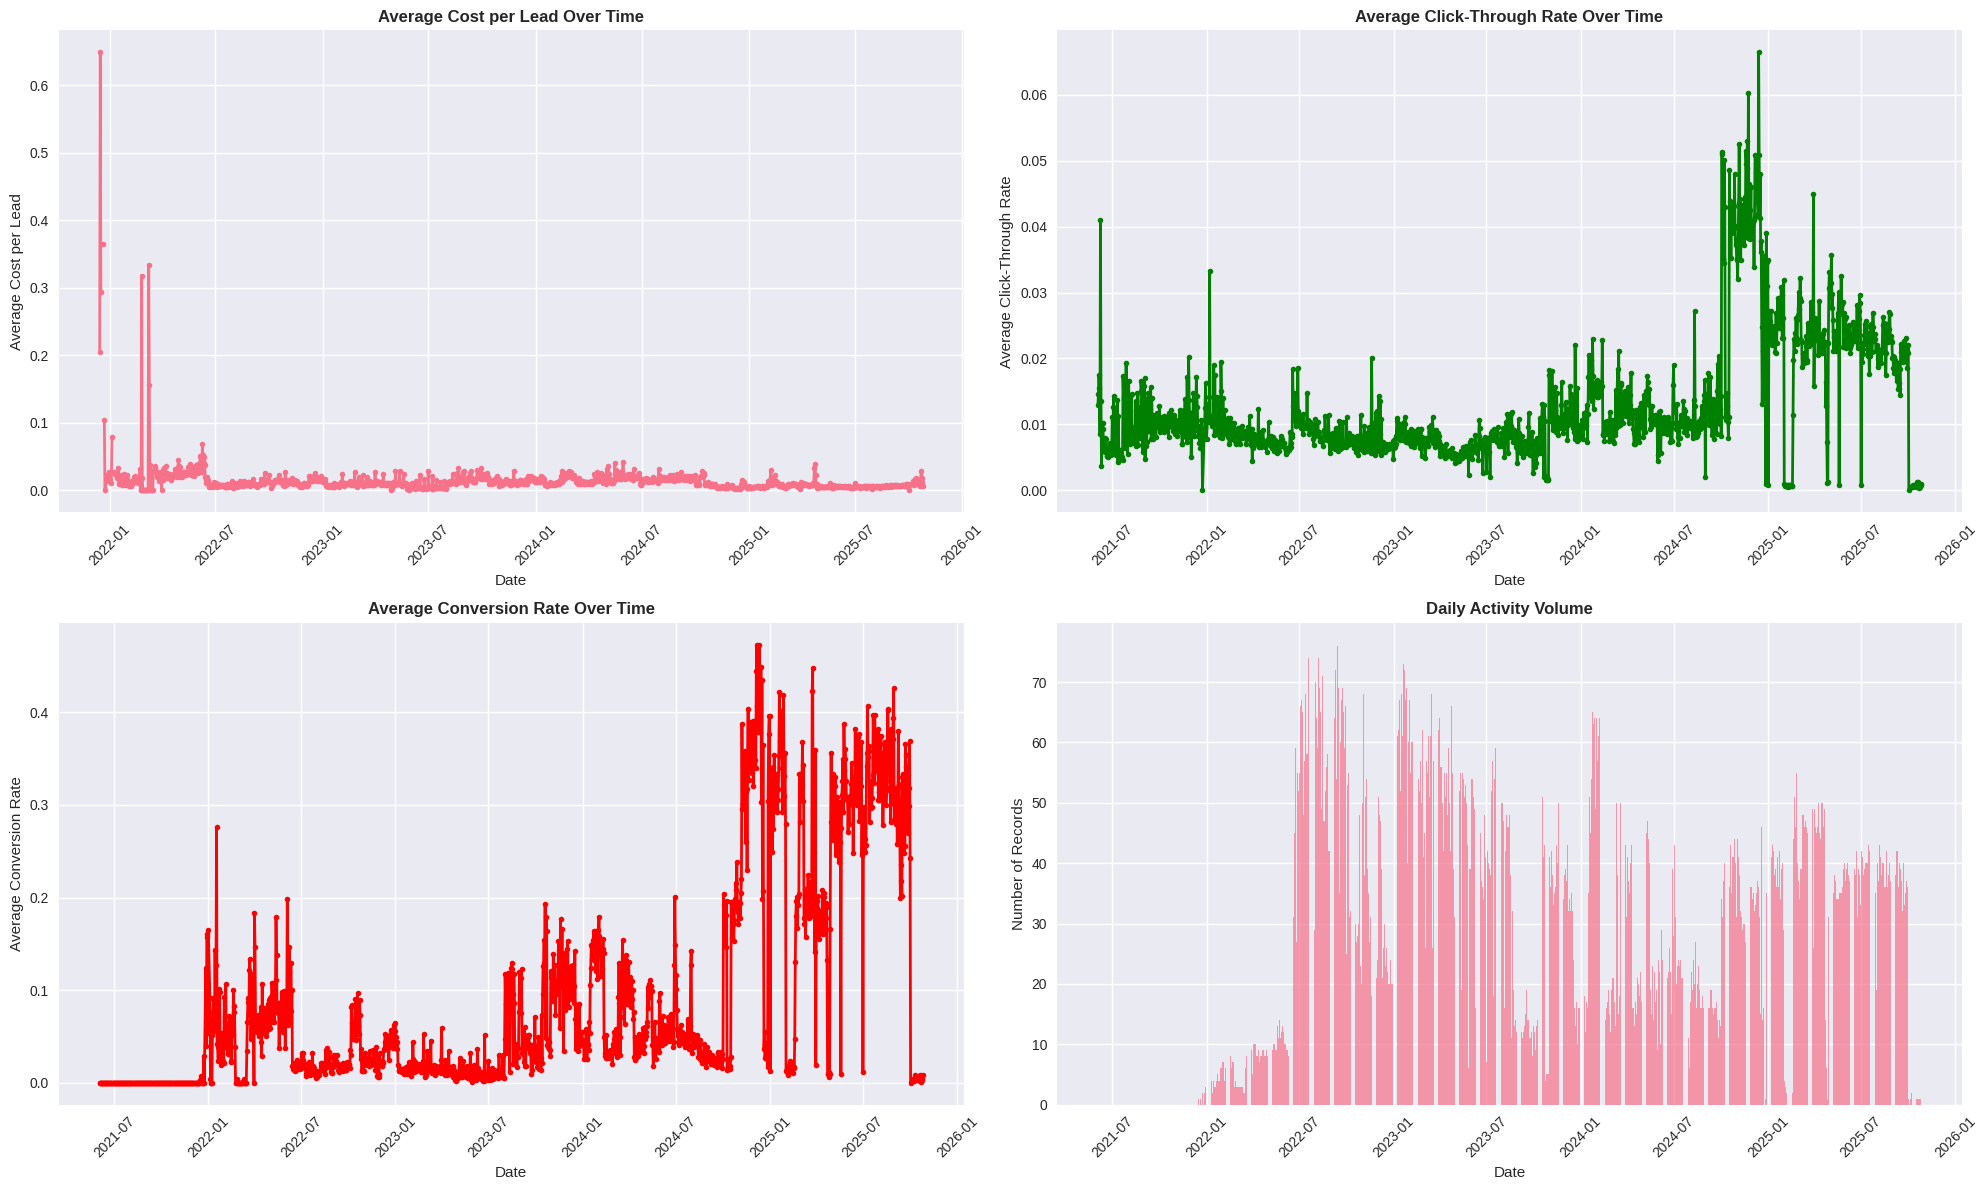

Analysis period: 2021-06-03 00:00:00 to 2025-10-26 00:00:00
Total days with data: 1598


In [ ]:
# 2. TIME SERIES ANALYSIS
print("2. Time Series Analysis")
print("="*50)

# Group by date and calculate daily metrics
daily_metrics = data.groupby('date').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

# Flatten column names
daily_metrics.columns = ['_'.join(col).strip() for col in daily_metrics.columns]
daily_metrics = daily_metrics.reset_index()

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Cost per Lead over time
axes[0, 0].plot(daily_metrics['date'], daily_metrics['Cost per Lead_anon_mean'], 
                marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Average Cost per Lead Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Average Cost per Lead')
axes[0, 0].tick_params(axis='x', rotation=45)

# Click-Through Rate over time
axes[0, 1].plot(daily_metrics['date'], daily_metrics['Click-Through Rate_mean'], 
                marker='o', linewidth=2, markersize=4, color='green')
axes[0, 1].set_title('Average Click-Through Rate Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Click-Through Rate')
axes[0, 1].tick_params(axis='x', rotation=45)

# Conversion Rate over time
axes[1, 0].plot(daily_metrics['date'], daily_metrics['Conversion Rate_mean'], 
                marker='o', linewidth=2, markersize=4, color='red')
axes[1, 0].set_title('Average Conversion Rate Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Average Conversion Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

# Daily volume (number of records)
axes[1, 1].bar(daily_metrics['date'], daily_metrics['Cost per Lead_anon_count'], alpha=0.7)
axes[1, 1].set_title('Daily Activity Volume', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Analysis period: {daily_metrics['date'].min()} to {daily_metrics['date'].max()}")
print(f"Total days with data: {len(daily_metrics)}")

3. Seasonal and Temporal Patterns


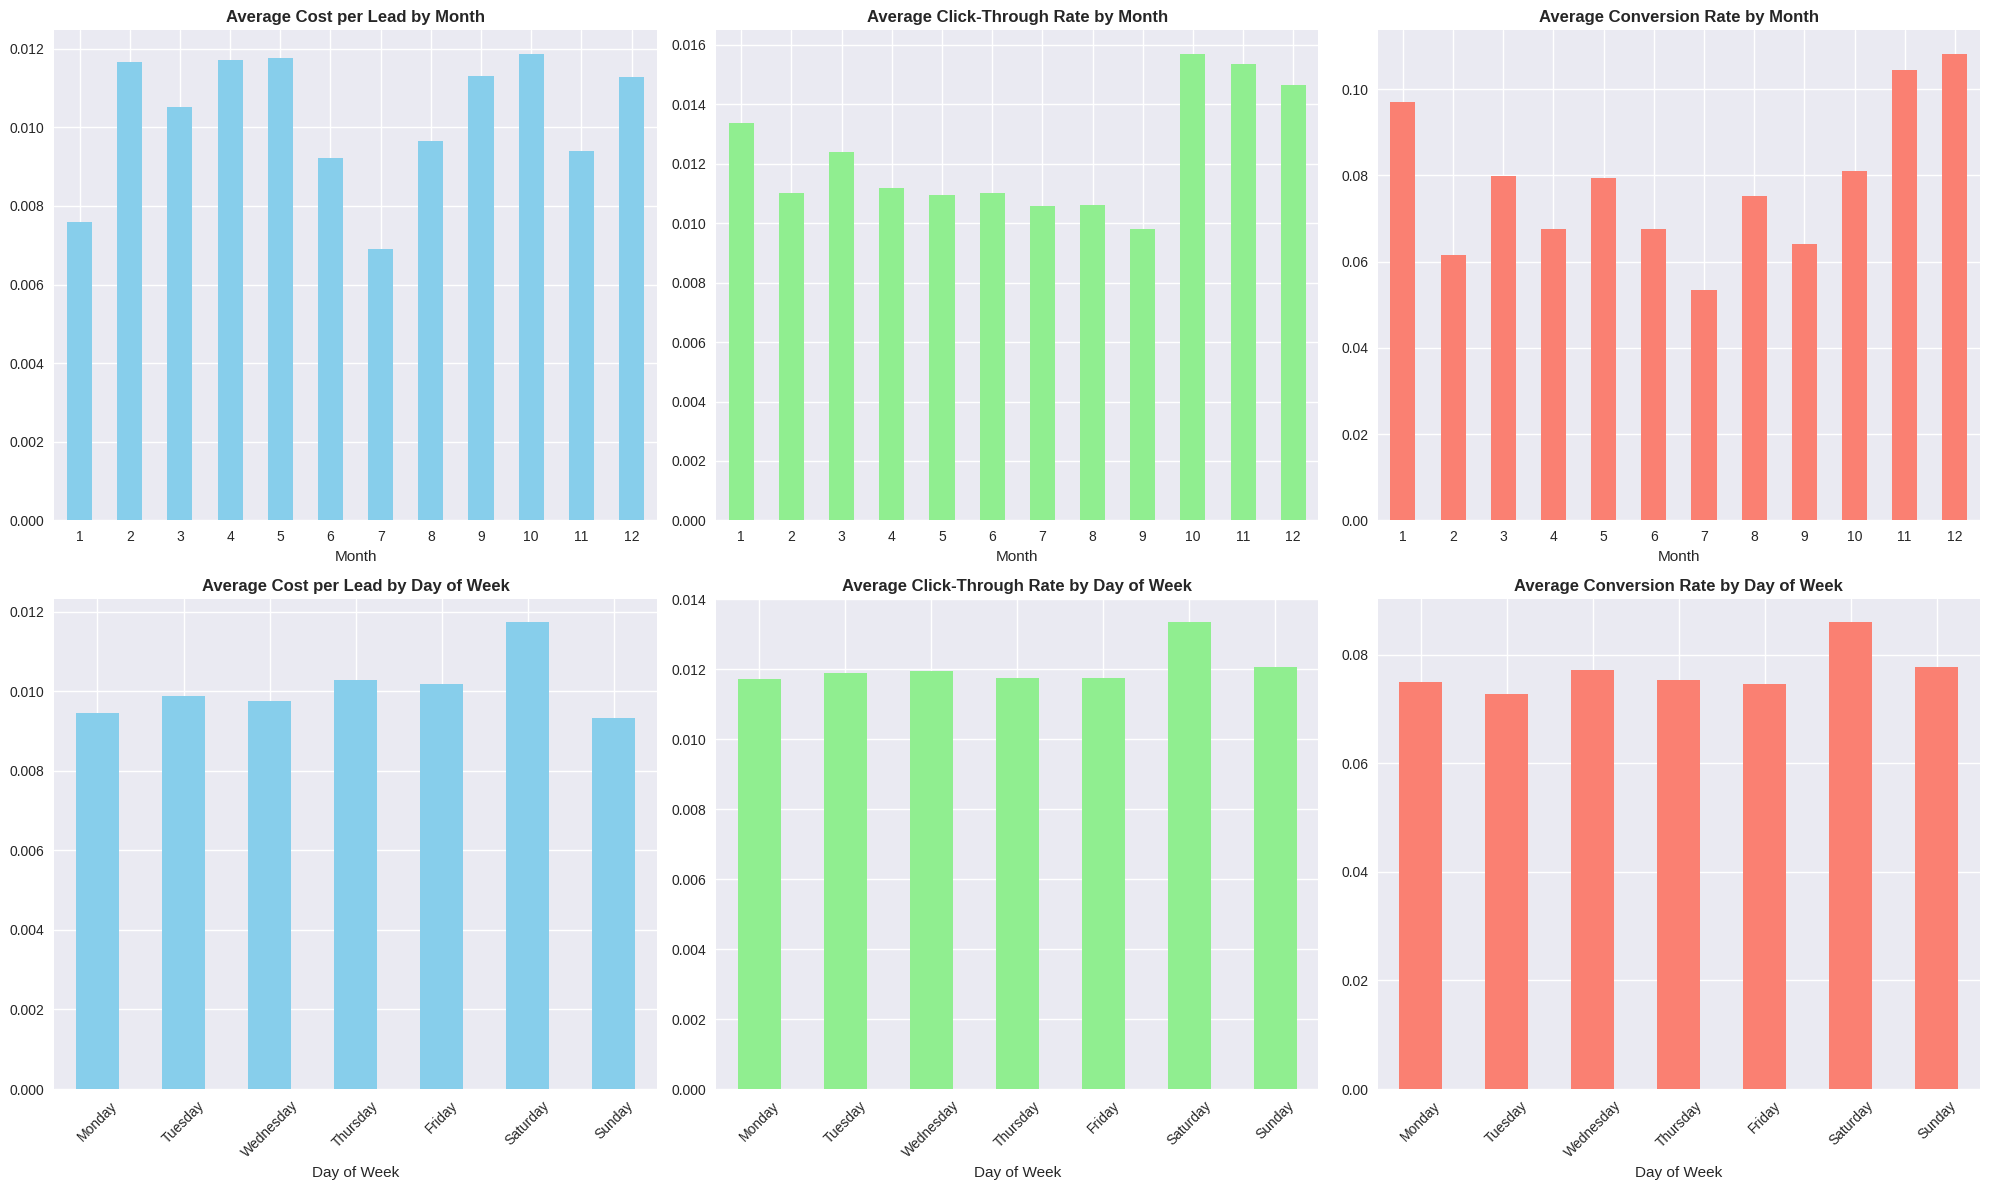

Monthly Performance Summary:


Cost per Lead_anon  Click-Through Rate  Conversion Rate
month                                                         
1                0.007591            0.013358         0.096957
2                0.011664            0.011015         0.061441
3                0.010515            0.012391         0.079891
4                0.011713            0.011195         0.067512
5                0.011758            0.010943         0.079460
6                0.009214            0.011025         0.067502
7                0.006895            0.010593         0.053325
8                0.009652            0.010612         0.075135
9                0.011303            0.009805         0.064200
10               0.011872            0.015706         0.080922
11               0.009392            0.015352         0.104536
12               0.011286            0.014660         0.108224


Day of Week Performance Summary:


Cost per Lead_anon  Click-Through Rate  Conversion Rate
day_of_week_name                                                         
Monday                      0.009456            0.011719         0.075044
Tuesday                     0.009872            0.011899         0.072837
Wednesday                   0.009761            0.011953         0.077250
Thursday                    0.010273            0.011745         0.075369
Friday                      0.010191            0.011750         0.074578
Saturday                    0.011729            0.013341         0.085963
Sunday                      0.009319            0.012071         0.077644


Quarterly Performance Summary:


Cost per Lead_anon  Click-Through Rate  Conversion Rate
quater                                                         
1                 0.009803            0.012297         0.079971
2                 0.010857            0.011057         0.071186
3                 0.009099            0.010369         0.063765
4                 0.010733            0.015272         0.097988

In [ ]:
# 3. SEASONAL AND TEMPORAL PATTERNS
print("3. Seasonal and Temporal Patterns")
print("="*50)

# Monthly analysis
monthly_data = data.groupby('month').agg({
    'Cost per Lead_anon': 'mean',
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

# Day of week analysis
dow_data = data.groupby('day_of_week_name').agg({
    'Cost per Lead_anon': 'mean',
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

# Reorder days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_data = dow_data.reindex([day for day in day_order if day in dow_data.index])

# Quarter analysis
quarter_data = data.groupby('quater').agg({
    'Cost per Lead_anon': 'mean',
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Monthly patterns
monthly_data['Cost per Lead_anon'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Cost per Lead by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].tick_params(axis='x', rotation=0)

monthly_data['Click-Through Rate'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Click-Through Rate by Month', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].tick_params(axis='x', rotation=0)

monthly_data['Conversion Rate'].plot(kind='bar', ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('Average Conversion Rate by Month', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Month')
axes[0, 2].tick_params(axis='x', rotation=0)

# Day of week patterns
dow_data['Cost per Lead_anon'].plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Average Cost per Lead by Day of Week', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].tick_params(axis='x', rotation=45)

dow_data['Click-Through Rate'].plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Average Click-Through Rate by Day of Week', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].tick_params(axis='x', rotation=45)

dow_data['Conversion Rate'].plot(kind='bar', ax=axes[1, 2], color='salmon')
axes[1, 2].set_title('Average Conversion Rate by Day of Week', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Day of Week')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Monthly Performance Summary:")
display(monthly_data)

print("\nDay of Week Performance Summary:")
display(dow_data)

print("\nQuarterly Performance Summary:")
display(quarter_data)

4. Campaign Performance Analysis


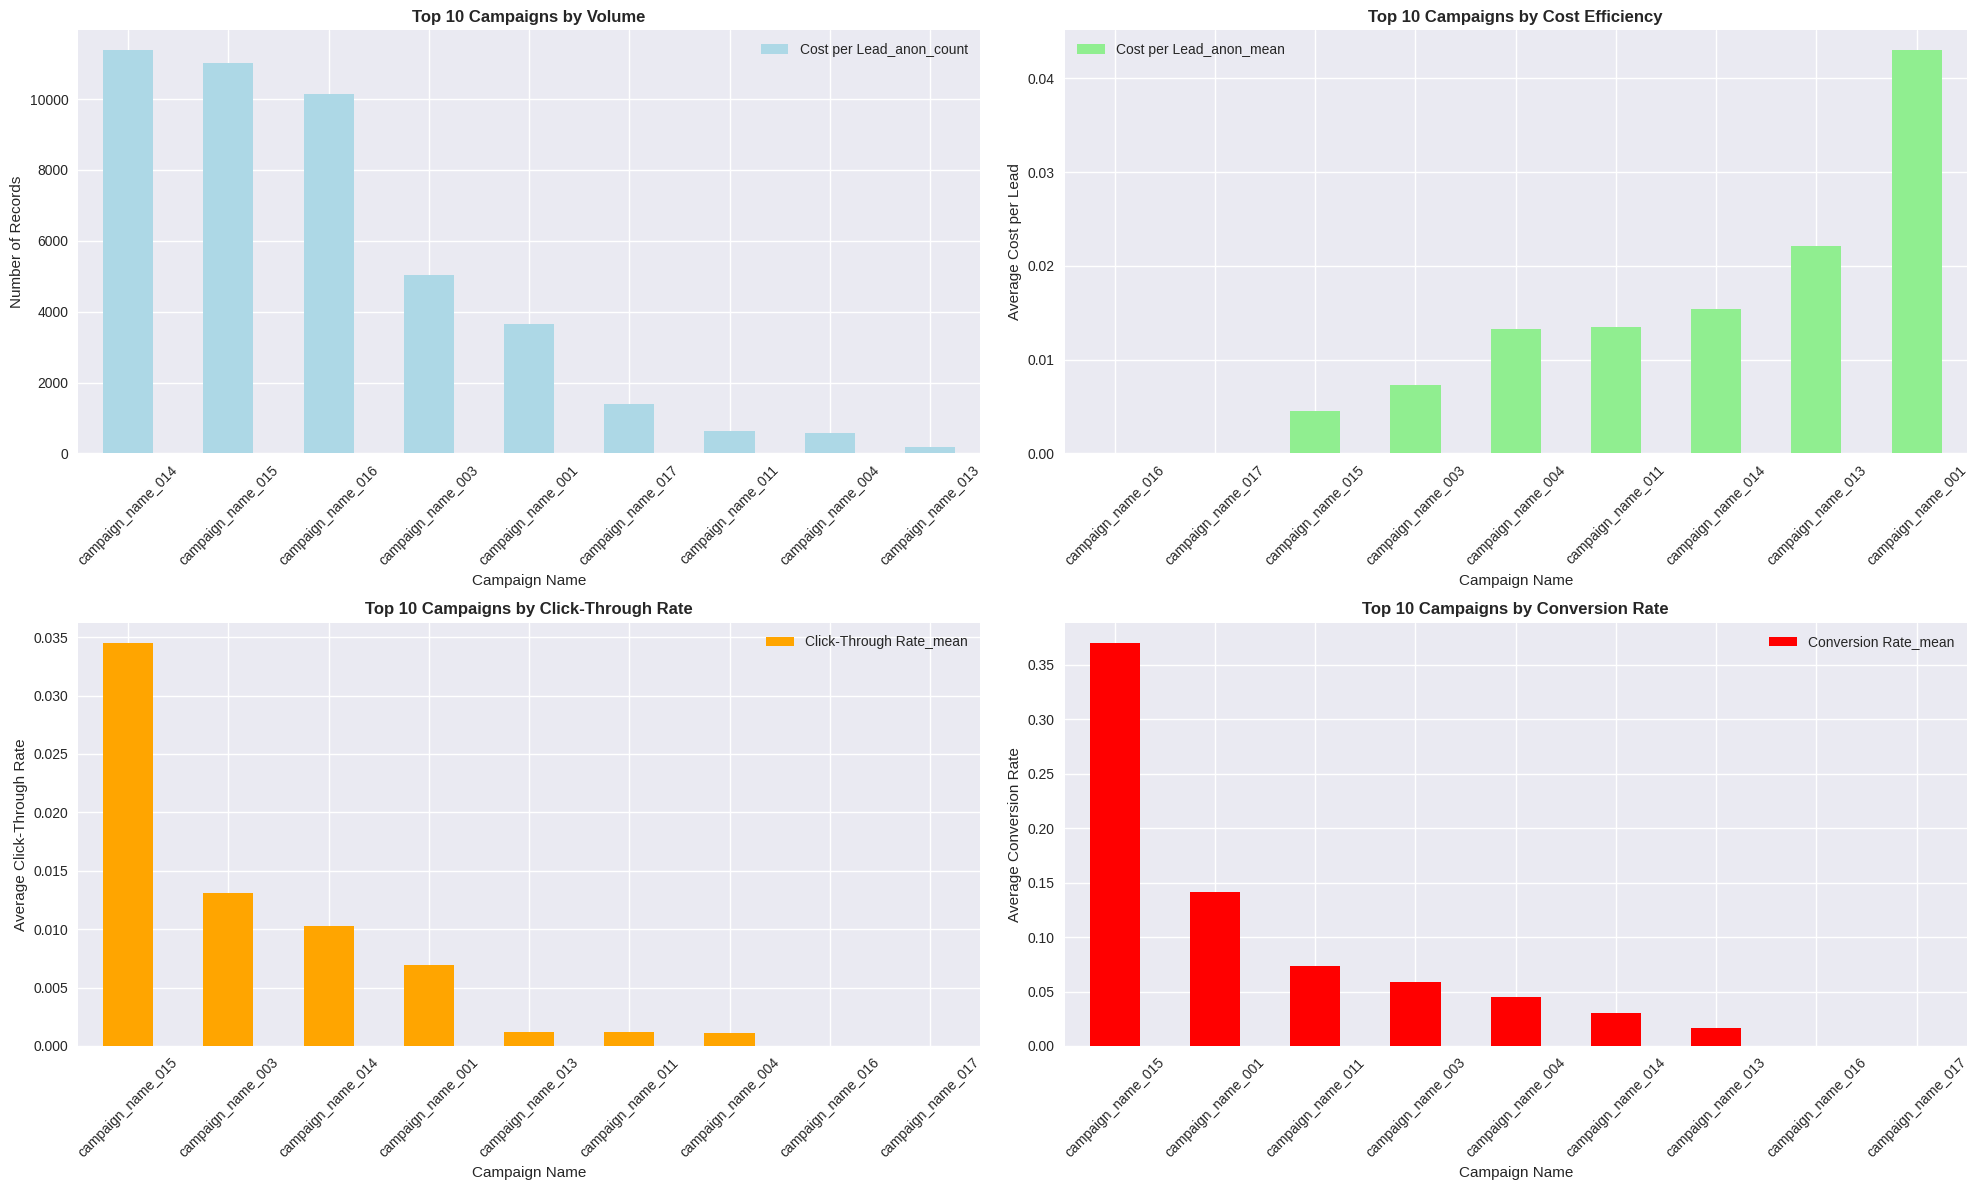

Total unique campaigns: 18
Campaigns with significant activity (>=100 records): 9

Top 5 Best Performing Campaigns (by Cost per Lead):


campaign_name_anon  Cost per Lead_anon_mean  Cost per Lead_anon_count  \
15  campaign_name_016                 0.000000                     10132   
16  campaign_name_017                 0.000000                      1383   
14  campaign_name_015                 0.004494                     11021   
2   campaign_name_003                 0.007298                      5022   
3   campaign_name_004                 0.013243                       586   

    Click-Through Rate_mean  Conversion Rate_mean  
15                 0.000000              0.000000  
16                 0.000000              0.000000  
14                 0.034502              0.369954  
2                  0.013136              0.059010  
3                  0.001125              0.045252

In [ ]:
# 4. CAMPAIGN PERFORMANCE ANALYSIS
print("4. Campaign Performance Analysis")
print("="*50)

# Top performing campaigns by different metrics
campaign_performance = data.groupby('campaign_name_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

campaign_performance.columns = ['_'.join(col).strip() for col in campaign_performance.columns]
campaign_performance = campaign_performance.reset_index()

# Filter campaigns with significant activity (at least 100 records)
significant_campaigns = campaign_performance[campaign_performance['Cost per Lead_anon_count'] >= 100]

# Top 10 campaigns by volume
top_campaigns_volume = significant_campaigns.nlargest(10, 'Cost per Lead_anon_count')

# Best performing campaigns (lowest cost per lead with good volume)
best_campaigns = significant_campaigns.nsmallest(10, 'Cost per Lead_anon_mean')

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Top campaigns by volume
top_campaigns_volume.plot(x='campaign_name_anon', y='Cost per Lead_anon_count', 
                         kind='bar', ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Top 10 Campaigns by Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Campaign Name')
axes[0, 0].set_ylabel('Number of Records')
axes[0, 0].tick_params(axis='x', rotation=45)

# Best performing campaigns (lowest cost per lead)
best_campaigns.plot(x='campaign_name_anon', y='Cost per Lead_anon_mean', 
                   kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Top 10 Campaigns by Cost Efficiency', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Campaign Name')
axes[0, 1].set_ylabel('Average Cost per Lead')
axes[0, 1].tick_params(axis='x', rotation=45)

# Click-through rate by campaign (top 10)
top_ctr_campaigns = significant_campaigns.nlargest(10, 'Click-Through Rate_mean')
top_ctr_campaigns.plot(x='campaign_name_anon', y='Click-Through Rate_mean', 
                      kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top 10 Campaigns by Click-Through Rate', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Campaign Name')
axes[1, 0].set_ylabel('Average Click-Through Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

# Conversion rate by campaign (top 10)
top_conv_campaigns = significant_campaigns.nlargest(10, 'Conversion Rate_mean')
top_conv_campaigns.plot(x='campaign_name_anon', y='Conversion Rate_mean', 
                       kind='bar', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Top 10 Campaigns by Conversion Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Campaign Name')
axes[1, 1].set_ylabel('Average Conversion Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Total unique campaigns: {data['campaign_name_anon'].nunique()}")
print(f"Campaigns with significant activity (>=100 records): {len(significant_campaigns)}")

print("\nTop 5 Best Performing Campaigns (by Cost per Lead):")
display(best_campaigns.head()[['campaign_name_anon', 'Cost per Lead_anon_mean', 
                               'Cost per Lead_anon_count', 'Click-Through Rate_mean', 
                               'Conversion Rate_mean']])

5. Geographic and Vertical Analysis


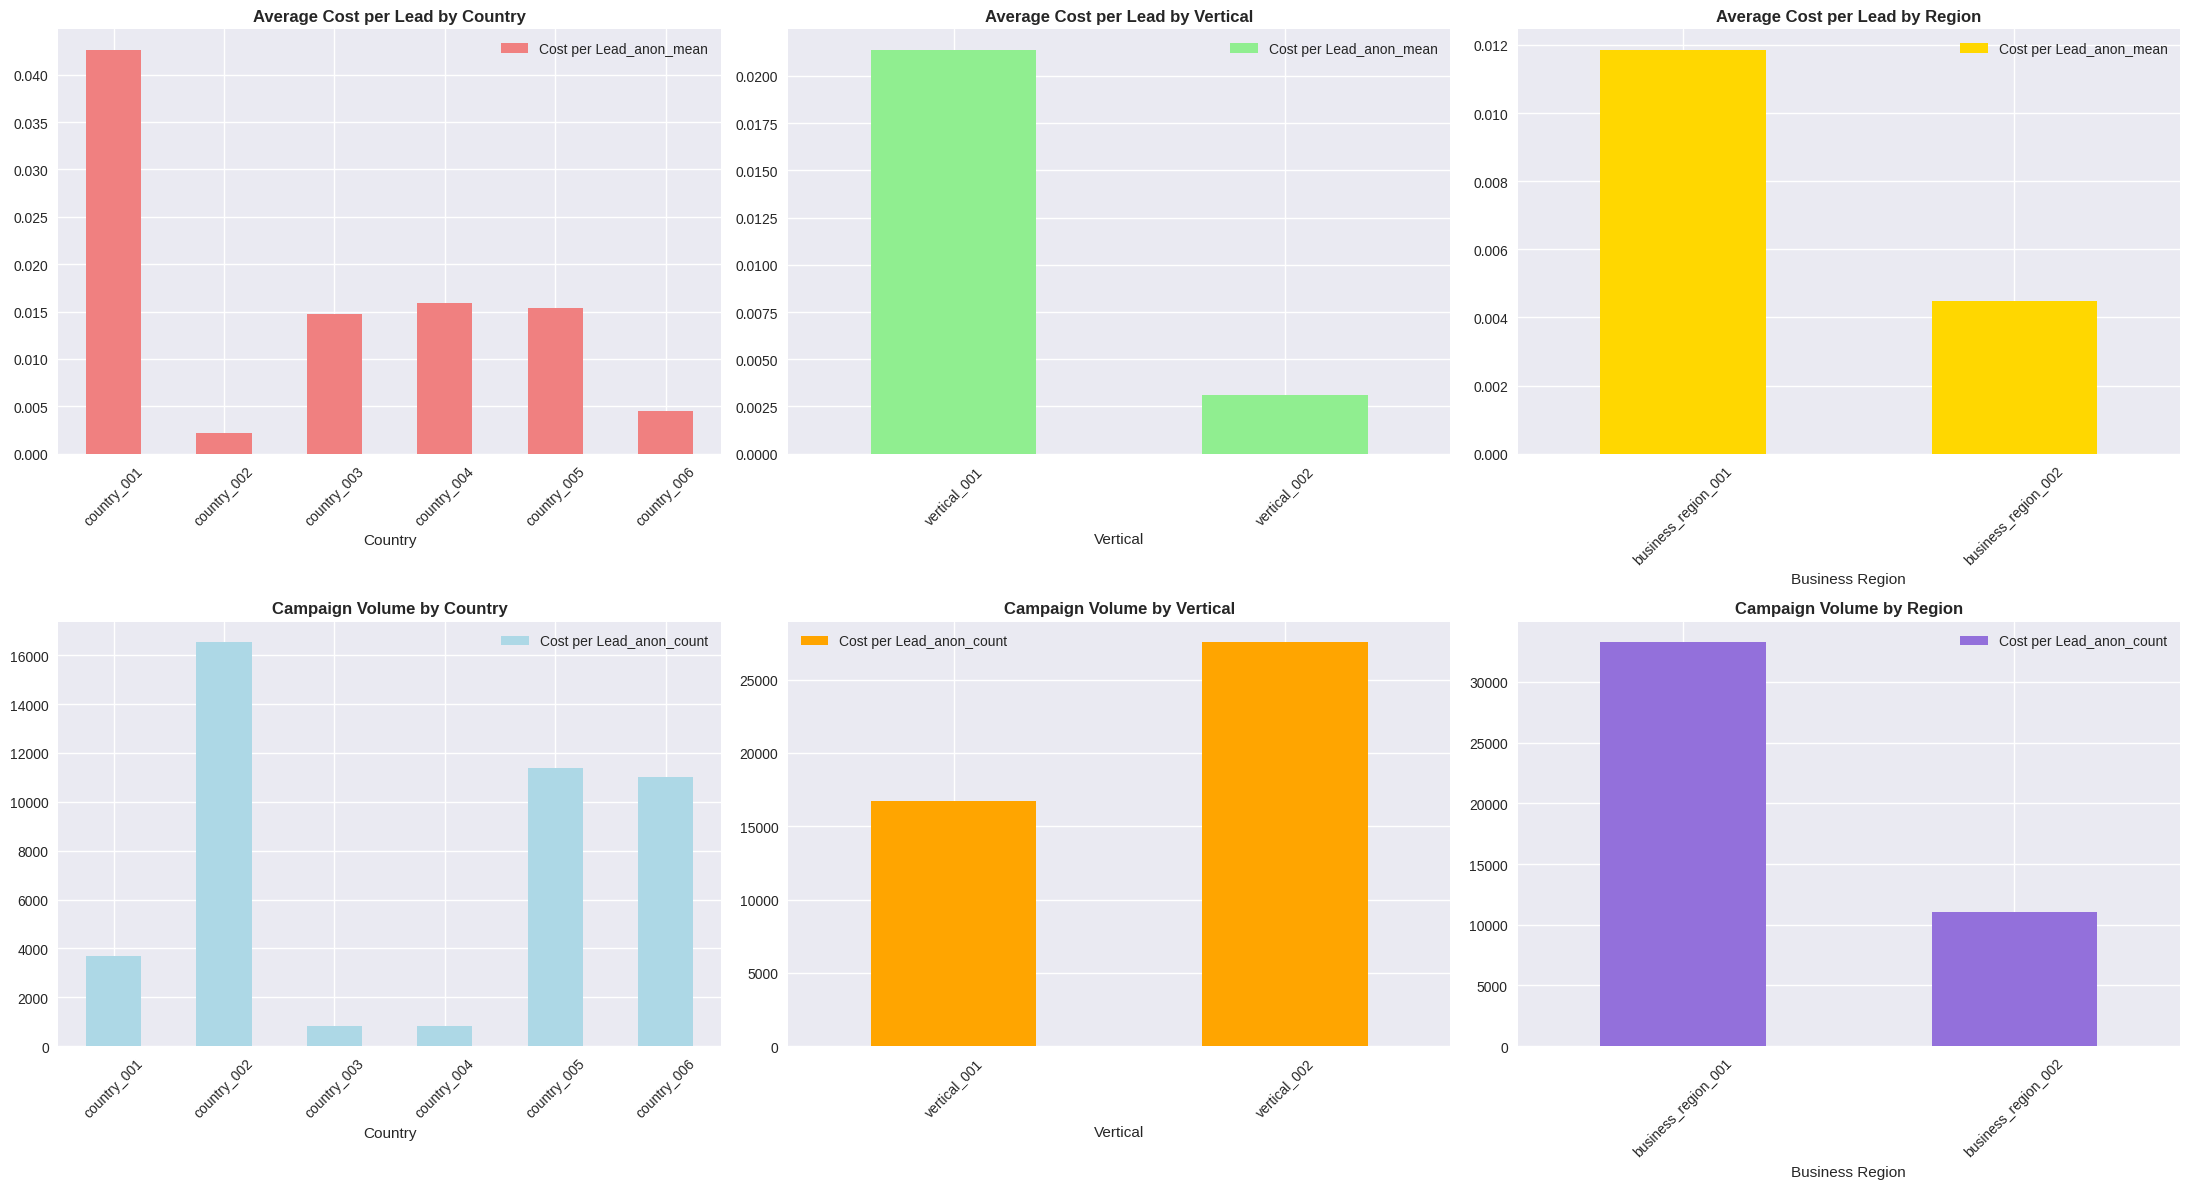

Geographic Performance Summary:

By Country:


country_anon  Cost per Lead_anon_mean  Cost per Lead_anon_sum  \
1  country_002                 0.002216               36.652048   
4  country_005                 0.015415              175.265480   
5  country_006                 0.004494               49.526457   
0  country_001                 0.042649              157.119025   
3  country_004                 0.015870               13.425822   
2  country_003                 0.014697               12.360260   

   Cost per Lead_anon_count  Click-Through Rate_mean  Conversion Rate_mean  
1                     16537                 0.009969              0.044782  
4                     11370                 0.010293              0.029965  
5                     11021                 0.034502              0.369954  
0                      3684                 0.007458              0.076615  
3                       846                 0.001209              0.023032  
2                       841                 0.001125              0.009946


By Vertical:


vertical_anon  Cost per Lead_anon_mean  Cost per Lead_anon_sum  \
1  vertical_002                 0.003127               86.178505   
0  vertical_001                 0.021395              358.170587   

   Cost per Lead_anon_count  Click-Through Rate_mean  Conversion Rate_mean  
1                     27558                 0.015288              0.115288  
0                     16741                 0.008570              0.035670


By Region:


business_region_anon  Cost per Lead_anon_mean  Cost per Lead_anon_sum  \
0  business_region_001                 0.011864              394.822635   
1  business_region_002                 0.004494               49.526457   

   Cost per Lead_anon_count  Click-Through Rate_mean  Conversion Rate_mean  
0                     33278                 0.009206              0.039810  
1                     11021                 0.034502              0.369954

In [ ]:
# 5. GEOGRAPHIC AND VERTICAL ANALYSIS
print("5. Geographic and Vertical Analysis")
print("="*50)

# Country performance analysis
country_performance = data.groupby('country_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

country_performance.columns = ['_'.join(col).strip() for col in country_performance.columns]
country_performance = country_performance.reset_index()

# Vertical performance analysis
vertical_performance = data.groupby('vertical_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

vertical_performance.columns = ['_'.join(col).strip() for col in vertical_performance.columns]
vertical_performance = vertical_performance.reset_index()

# Business region analysis
region_performance = data.groupby('business_region_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

region_performance.columns = ['_'.join(col).strip() for col in region_performance.columns]
region_performance = region_performance.reset_index()

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# Country analysis
country_performance.plot(x='country_anon', y='Cost per Lead_anon_mean', 
                        kind='bar', ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('Average Cost per Lead by Country', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Country')
axes[0, 0].tick_params(axis='x', rotation=45)

country_performance.plot(x='country_anon', y='Cost per Lead_anon_count', 
                        kind='bar', ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('Campaign Volume by Country', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Country')
axes[1, 0].tick_params(axis='x', rotation=45)

# Vertical analysis
vertical_performance.plot(x='vertical_anon', y='Cost per Lead_anon_mean', 
                         kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Cost per Lead by Vertical', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Vertical')
axes[0, 1].tick_params(axis='x', rotation=45)

vertical_performance.plot(x='vertical_anon', y='Cost per Lead_anon_count', 
                         kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Campaign Volume by Vertical', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Vertical')
axes[1, 1].tick_params(axis='x', rotation=45)

# Region analysis
region_performance.plot(x='business_region_anon', y='Cost per Lead_anon_mean', 
                       kind='bar', ax=axes[0, 2], color='gold')
axes[0, 2].set_title('Average Cost per Lead by Region', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Business Region')
axes[0, 2].tick_params(axis='x', rotation=45)

region_performance.plot(x='business_region_anon', y='Cost per Lead_anon_count', 
                       kind='bar', ax=axes[1, 2], color='mediumpurple')
axes[1, 2].set_title('Campaign Volume by Region', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Business Region')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Geographic Performance Summary:")
print("\nBy Country:")
display(country_performance.sort_values('Cost per Lead_anon_count', ascending=False))

print("\nBy Vertical:")
display(vertical_performance.sort_values('Cost per Lead_anon_count', ascending=False))

print("\nBy Region:")
display(region_performance.sort_values('Cost per Lead_anon_count', ascending=False))

6. Correlation Analysis


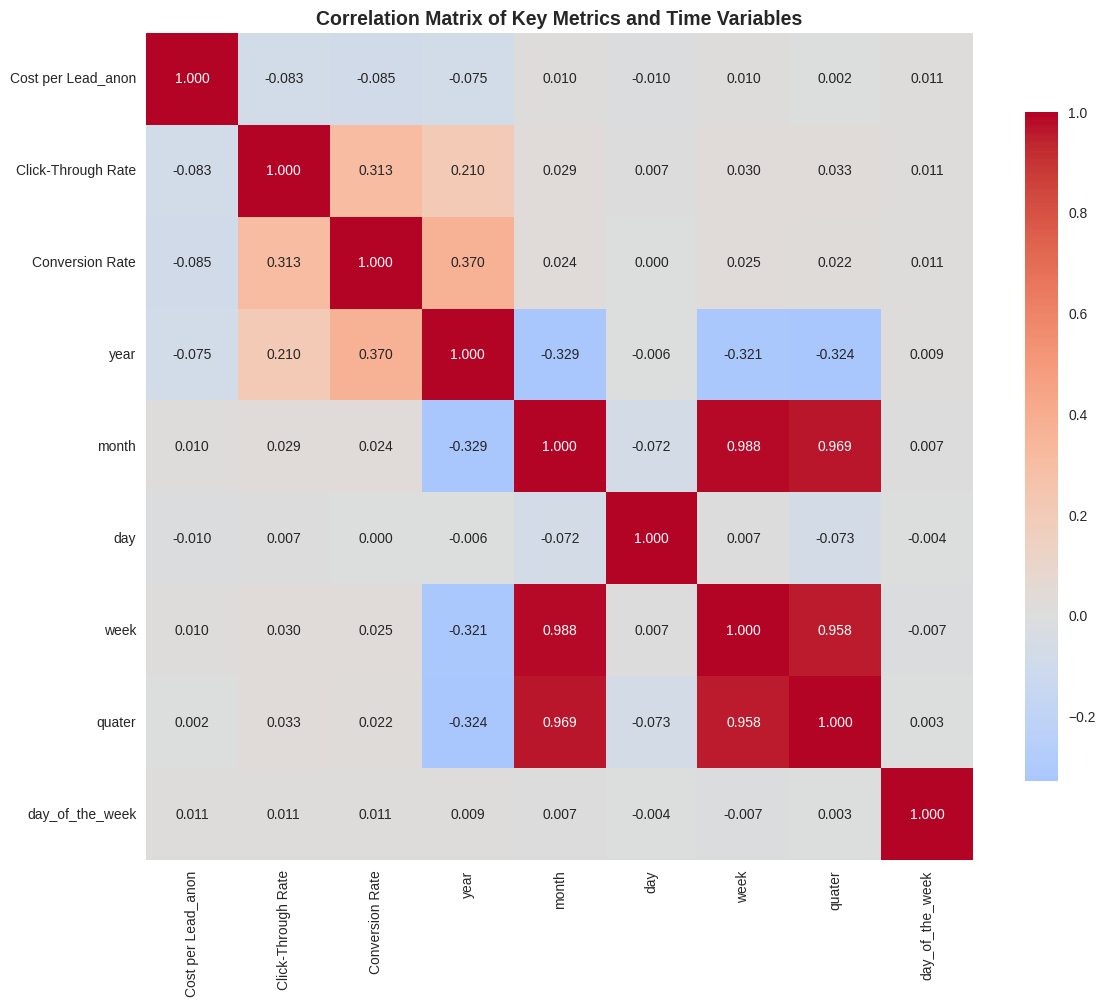

Correlation Analysis Summary:
Strongest correlations (absolute value > 0.1):


Variable 1       Variable 2  Correlation
27               month             week     0.988158
28               month           quater     0.968618
33                week           quater     0.958002
15     Conversion Rate             year     0.370229
21                year            month    -0.329158
24                year           quater    -0.324211
23                year             week    -0.321229
8   Click-Through Rate  Conversion Rate     0.313130
9   Click-Through Rate             year     0.210279

In [ ]:
# 6. CORRELATION ANALYSIS AND HEATMAP
print("6. Correlation Analysis")
print("="*50)

# Create correlation matrix for numeric columns
numeric_data = data[['Cost per Lead_anon', 'Click-Through Rate', 'Conversion Rate', 
                     'year', 'month', 'day', 'week', 'quater', 'day_of_the_week']]

correlation_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Metrics and Time Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Analysis Summary:")
print("="*30)

# Find strongest correlations
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Variable 1': correlation_matrix.columns[i],
            'Variable 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df = corr_df.sort_values('Correlation', key=abs, ascending=False)

print("Strongest correlations (absolute value > 0.1):")
strong_corr = corr_df[abs(corr_df['Correlation']) > 0.1]
display(strong_corr)

7. Traffic Source and Ad Performance Analysis


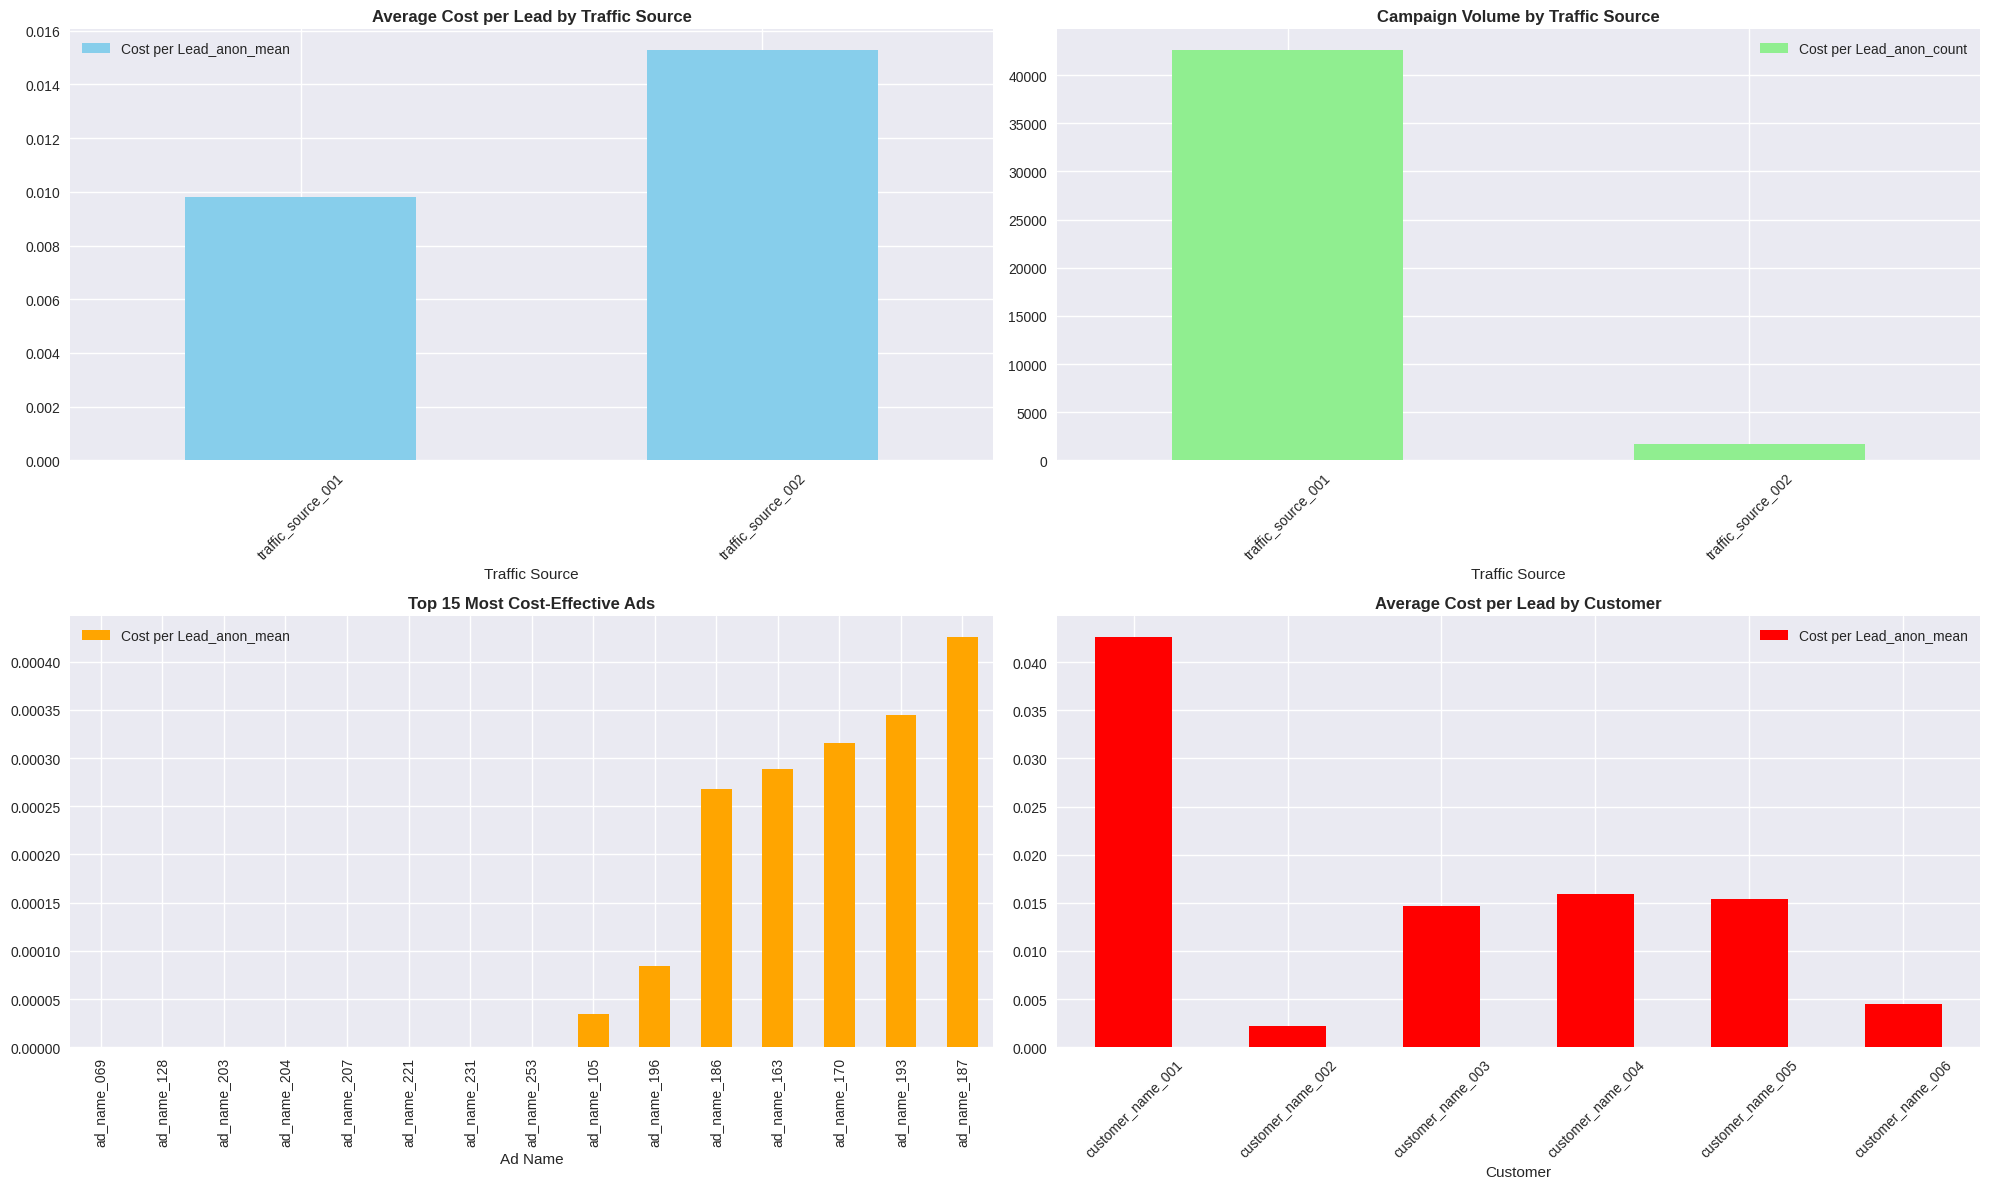

Traffic Source Performance:


traffic_source_anon  Cost per Lead_anon_mean  Cost per Lead_anon_sum  \
0  traffic_source_001                 0.009823              418.563010   
1  traffic_source_002                 0.015285               25.786082   

   Cost per Lead_anon_count  Click-Through Rate_mean  Conversion Rate_mean  
0                     42612                 0.012807              0.081075  
1                      1687                 0.001159              0.015283


Customer Performance:


customer_name_anon  Cost per Lead_anon_mean  Cost per Lead_anon_sum  \
1  customer_name_002                 0.002216               36.652048   
4  customer_name_005                 0.015415              175.265480   
5  customer_name_006                 0.004494               49.526457   
0  customer_name_001                 0.042649              157.119025   
3  customer_name_004                 0.015870               13.425822   
2  customer_name_003                 0.014697               12.360260   

   Cost per Lead_anon_count  Click-Through Rate_mean  Conversion Rate_mean  
1                     16537                 0.009969              0.044782  
4                     11370                 0.010293              0.029965  
5                     11021                 0.034502              0.369954  
0                      3684                 0.007458              0.076615  
3                       846                 0.001209              0.023032  
2                       841                 0.001125              0.009946


Total unique ads: 404
Ads with significant activity (>=50 records): 190
Total unique customers: 6
Total unique traffic sources: 2


In [ ]:
# 7. TRAFFIC SOURCE AND AD PERFORMANCE ANALYSIS
print("7. Traffic Source and Ad Performance Analysis")
print("="*50)

# Traffic source analysis
traffic_source_performance = data.groupby('traffic_source_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

traffic_source_performance.columns = ['_'.join(col).strip() for col in traffic_source_performance.columns]
traffic_source_performance = traffic_source_performance.reset_index()

# Ad name analysis (top performers)
ad_performance = data.groupby('ad_name_anon').agg({
    'Cost per Lead_anon': ['mean', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

ad_performance.columns = ['_'.join(col).strip() for col in ad_performance.columns]
ad_performance = ad_performance.reset_index()

# Filter ads with significant volume
significant_ads = ad_performance[ad_performance['Cost per Lead_anon_count'] >= 50]
top_ads = significant_ads.nsmallest(15, 'Cost per Lead_anon_mean')

# Customer analysis
customer_performance = data.groupby('customer_name_anon').agg({
    'Cost per Lead_anon': ['mean', 'sum', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

customer_performance.columns = ['_'.join(col).strip() for col in customer_performance.columns]
customer_performance = customer_performance.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Traffic source comparison
traffic_source_performance.plot(x='traffic_source_anon', y='Cost per Lead_anon_mean', 
                               kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Cost per Lead by Traffic Source', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Traffic Source')
axes[0, 0].tick_params(axis='x', rotation=45)

traffic_source_performance.plot(x='traffic_source_anon', y='Cost per Lead_anon_count', 
                               kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Campaign Volume by Traffic Source', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Traffic Source')
axes[0, 1].tick_params(axis='x', rotation=45)

# Top performing ads
top_ads.plot(x='ad_name_anon', y='Cost per Lead_anon_mean', 
             kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top 15 Most Cost-Effective Ads', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Ad Name')
axes[1, 0].tick_params(axis='x', rotation=90)

# Customer performance
customer_performance.plot(x='customer_name_anon', y='Cost per Lead_anon_mean', 
                         kind='bar', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Average Cost per Lead by Customer', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Customer')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Traffic Source Performance:")
display(traffic_source_performance)

print("\nCustomer Performance:")
display(customer_performance.sort_values('Cost per Lead_anon_count', ascending=False))

print(f"\nTotal unique ads: {data['ad_name_anon'].nunique()}")
print(f"Ads with significant activity (>=50 records): {len(significant_ads)}")
print(f"Total unique customers: {data['customer_name_anon'].nunique()}")
print(f"Total unique traffic sources: {data['traffic_source_anon'].nunique()}")

In [ ]:
# 8. INTERACTIVE PLOTLY VISUALIZATIONS
print("8. Interactive Visualizations")
print("="*50)

# Create data subset for interactive plots (remove NaN values)
plot_data = data.dropna(subset=['Click-Through Rate', 'Conversion Rate', 'Cost per Lead_anon'])

print(f"Using {len(plot_data):,} records for interactive plots (removed {len(data) - len(plot_data):,} records with missing values)")

# Create interactive scatter plot
fig = px.scatter(plot_data, 
                x='Click-Through Rate', 
                y='Conversion Rate',
                size='Cost per Lead_anon',
                color='vertical_anon',
                hover_data=['campaign_name_anon', 'country_anon', 'date'],
                title='Click-Through Rate vs Conversion Rate (sized by Cost per Lead)',
                labels={
                    'Click-Through Rate': 'Click-Through Rate',
                    'Conversion Rate': 'Conversion Rate',
                    'vertical_anon': 'Vertical'
                })

fig.update_layout(width=1000, height=600)
fig.show()

# Time series interactive plot
daily_data_clean = daily_metrics.dropna()

fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=daily_data_clean['date'],
    y=daily_data_clean['Cost per Lead_anon_mean'],
    mode='lines+markers',
    name='Cost per Lead',
    line=dict(color='blue', width=2),
    yaxis='y1'
))

fig2.add_trace(go.Scatter(
    x=daily_data_clean['date'],
    y=daily_data_clean['Click-Through Rate_mean'],
    mode='lines+markers',
    name='Click-Through Rate',
    line=dict(color='green', width=2),
    yaxis='y2'
))

fig2.add_trace(go.Scatter(
    x=daily_data_clean['date'],
    y=daily_data_clean['Conversion Rate_mean'],
    mode='lines+markers',
    name='Conversion Rate',
    line=dict(color='red', width=2),
    yaxis='y2'
))

fig2.update_layout(
    title='Interactive Time Series: Key Metrics Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cost per Lead', side='left'),
    yaxis2=dict(title='Rate (%)', side='right', overlaying='y'),
    width=1000,
    height=500,
    hovermode='x unified'
)

fig2.show()

print("Interactive plots created! Hover over data points for more details.")

8. Interactive Visualizations
Using 44,298 records for interactive plots (removed 74,039 records with missing values)


Interactive plots created! Hover over data points for more details.


9. Advanced Analytics and Insights


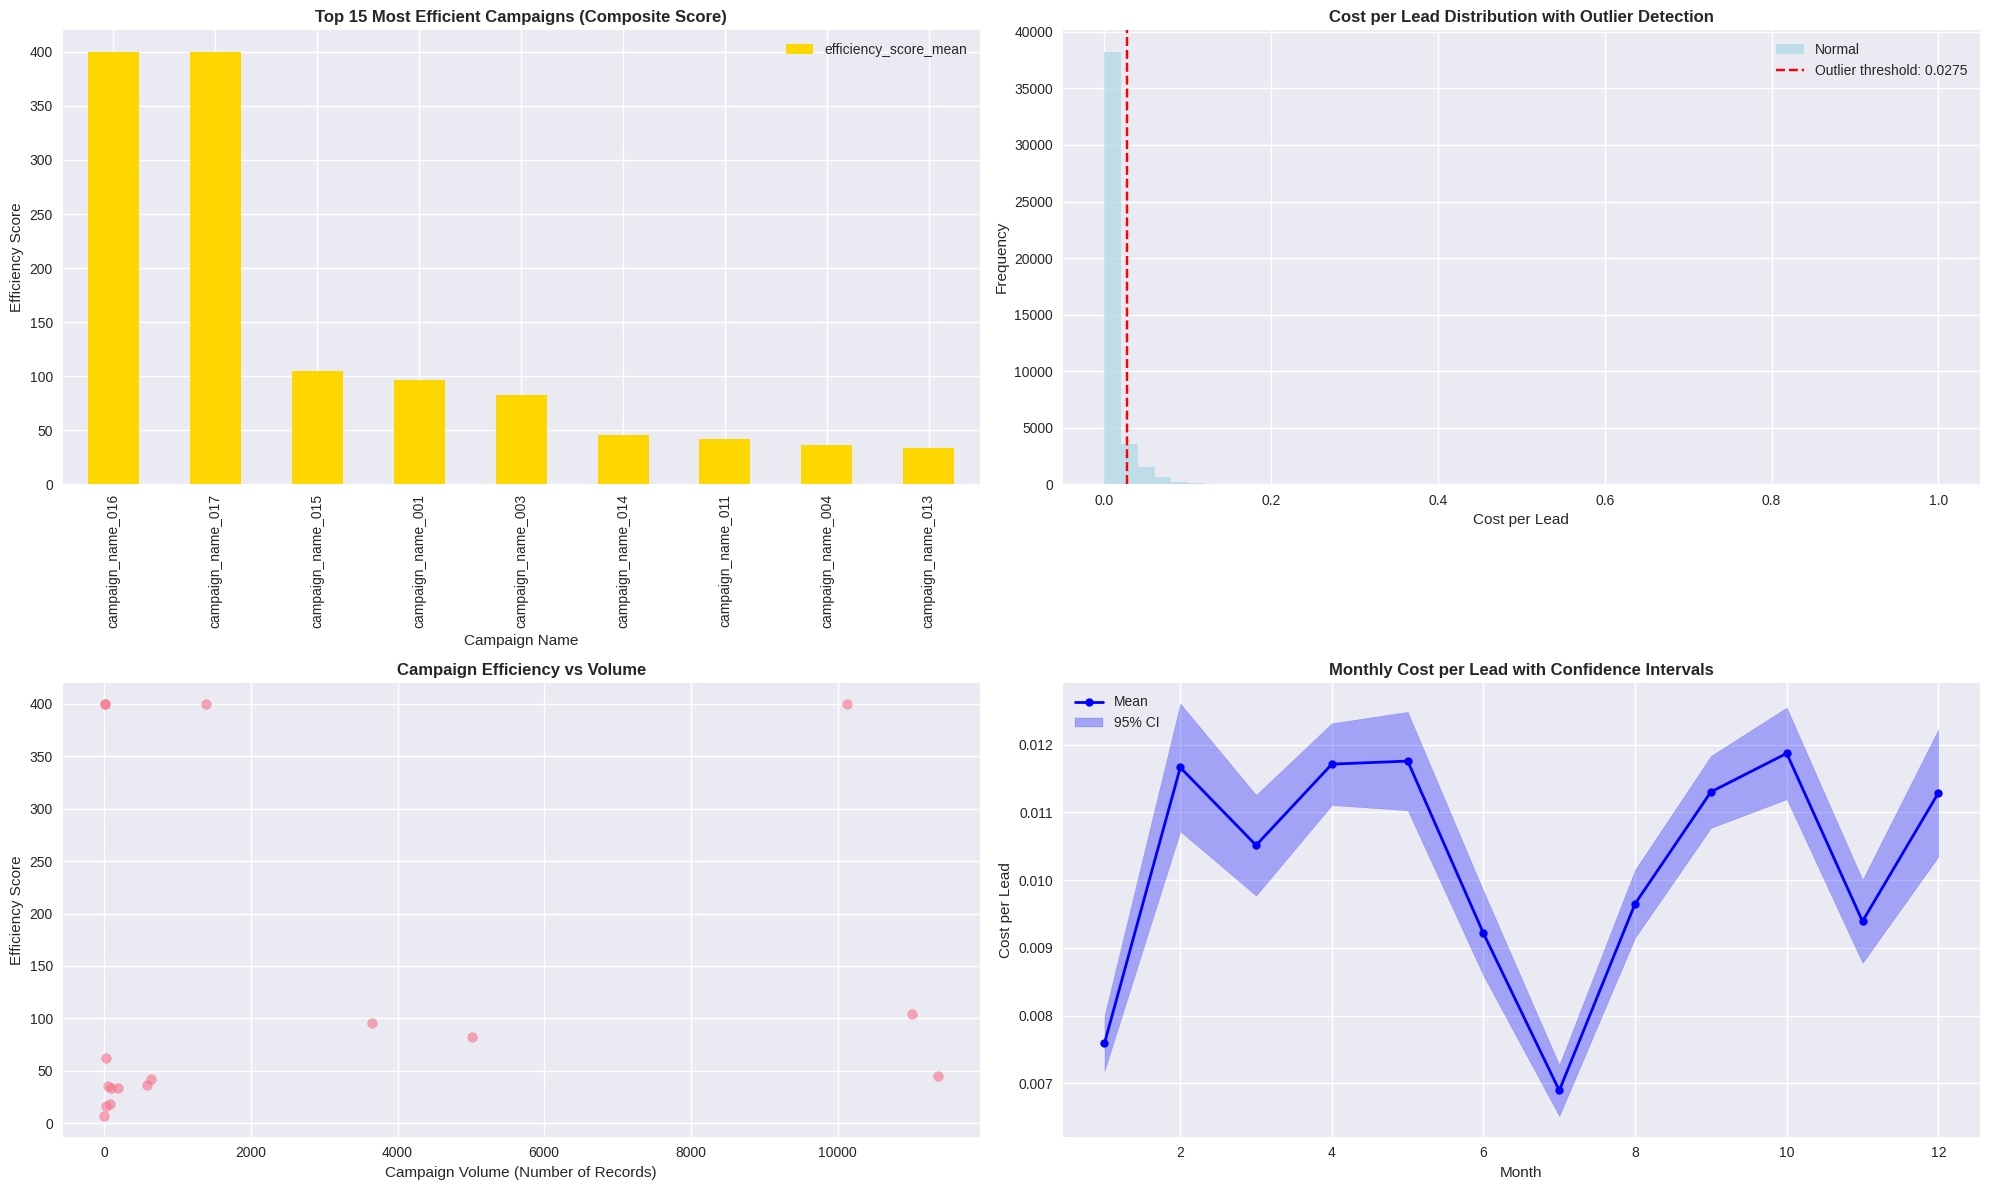

Advanced Analytics Summary:
Total records analyzed: 44,298
Outliers detected: 4,317 (3.6%)
Campaigns with significant data: 9

Top 5 Most Efficient Campaigns:


campaign_name_anon  efficiency_score_mean  Cost per Lead_anon_mean  \
14  campaign_name_016             400.000000                 0.000000   
15  campaign_name_017             400.000000                 0.000000   
13  campaign_name_015             104.320336                 0.004494   
0   campaign_name_001              95.960432                 0.042964   
2   campaign_name_003              82.187808                 0.007298   

    Cost per Lead_anon_count  
14                     10132  
15                      1383  
13                     11020  
0                       3657  
2                       5022


Outlier Analysis:
Q1 (25th percentile): 0.000000
Q3 (75th percentile): 0.011011
IQR: 0.011011
Outlier threshold (high): 0.027528
Maximum cost per lead: 1.000000


In [ ]:
# 9. ADVANCED ANALYTICS AND INSIGHTS
print("9. Advanced Analytics and Insights")
print("="*50)

# Performance efficiency analysis
# Create efficiency score based on multiple metrics
data_clean = data.dropna(subset=['Cost per Lead_anon', 'Click-Through Rate', 'Conversion Rate'])

# Normalize metrics (inverse for cost per lead since lower is better)
data_clean = data_clean.copy()
data_clean['cost_efficiency'] = 1 / (data_clean['Cost per Lead_anon'] + 0.001)  # Add small value to avoid division by zero
data_clean['ctr_normalized'] = data_clean['Click-Through Rate']
data_clean['conversion_normalized'] = data_clean['Conversion Rate']

# Create composite efficiency score
data_clean['efficiency_score'] = (
    data_clean['cost_efficiency'] * 0.4 + 
    data_clean['ctr_normalized'] * 0.3 + 
    data_clean['conversion_normalized'] * 0.3
)

# Campaign efficiency analysis
campaign_efficiency = data_clean.groupby('campaign_name_anon').agg({
    'efficiency_score': 'mean',
    'Cost per Lead_anon': ['mean', 'count'],
    'Click-Through Rate': 'mean',
    'Conversion Rate': 'mean'
}).round(6)

campaign_efficiency.columns = ['_'.join(col).strip() for col in campaign_efficiency.columns]
campaign_efficiency = campaign_efficiency.reset_index()

# Filter for campaigns with good sample size
efficient_campaigns = campaign_efficiency[campaign_efficiency['Cost per Lead_anon_count'] >= 100]
top_efficient = efficient_campaigns.nlargest(15, 'efficiency_score_mean')

# Outlier analysis
q1 = data['Cost per Lead_anon'].quantile(0.25)
q3 = data['Cost per Lead_anon'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

outliers = data[(data['Cost per Lead_anon'] < outlier_threshold_low) | 
                (data['Cost per Lead_anon'] > outlier_threshold_high)]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Top efficient campaigns
top_efficient.plot(x='campaign_name_anon', y='efficiency_score_mean', 
                  kind='bar', ax=axes[0, 0], color='gold')
axes[0, 0].set_title('Top 15 Most Efficient Campaigns (Composite Score)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Campaign Name')
axes[0, 0].set_ylabel('Efficiency Score')
axes[0, 0].tick_params(axis='x', rotation=90)

# Cost distribution with outliers highlighted
axes[0, 1].hist(data['Cost per Lead_anon'].dropna(), bins=50, alpha=0.7, color='lightblue', label='Normal')
axes[0, 1].axvline(outlier_threshold_high, color='red', linestyle='--', label=f'Outlier threshold: {outlier_threshold_high:.4f}')
axes[0, 1].set_title('Cost per Lead Distribution with Outlier Detection', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cost per Lead')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Efficiency vs Volume scatter plot
axes[1, 0].scatter(campaign_efficiency['Cost per Lead_anon_count'], 
                  campaign_efficiency['efficiency_score_mean'], 
                  alpha=0.6, s=50)
axes[1, 0].set_title('Campaign Efficiency vs Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Campaign Volume (Number of Records)')
axes[1, 0].set_ylabel('Efficiency Score')

# Monthly trend with confidence intervals
monthly_stats = data.groupby('month').agg({
    'Cost per Lead_anon': ['mean', 'std', 'count']
}).round(6)

monthly_stats.columns = ['_'.join(col).strip() for col in monthly_stats.columns]
monthly_stats = monthly_stats.reset_index()

# Calculate confidence intervals
monthly_stats['ci_lower'] = (monthly_stats['Cost per Lead_anon_mean'] - 
                            1.96 * monthly_stats['Cost per Lead_anon_std'] / 
                            np.sqrt(monthly_stats['Cost per Lead_anon_count']))
monthly_stats['ci_upper'] = (monthly_stats['Cost per Lead_anon_mean'] + 
                            1.96 * monthly_stats['Cost per Lead_anon_std'] / 
                            np.sqrt(monthly_stats['Cost per Lead_anon_count']))

axes[1, 1].plot(monthly_stats['month'], monthly_stats['Cost per Lead_anon_mean'], 
               marker='o', linewidth=2, markersize=6, color='blue', label='Mean')
axes[1, 1].fill_between(monthly_stats['month'], 
                       monthly_stats['ci_lower'], 
                       monthly_stats['ci_upper'], 
                       alpha=0.3, color='blue', label='95% CI')
axes[1, 1].set_title('Monthly Cost per Lead with Confidence Intervals', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Cost per Lead')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("Advanced Analytics Summary:")
print("="*30)
print(f"Total records analyzed: {len(data_clean):,}")
print(f"Outliers detected: {len(outliers):,} ({len(outliers)/len(data)*100:.1f}%)")
print(f"Campaigns with significant data: {len(efficient_campaigns)}")

print("\nTop 5 Most Efficient Campaigns:")
display(top_efficient.head()[['campaign_name_anon', 'efficiency_score_mean', 
                             'Cost per Lead_anon_mean', 'Cost per Lead_anon_count']])

print(f"\nOutlier Analysis:")
print(f"Q1 (25th percentile): {q1:.6f}")
print(f"Q3 (75th percentile): {q3:.6f}")
print(f"IQR: {iqr:.6f}")
print(f"Outlier threshold (high): {outlier_threshold_high:.6f}")
print(f"Maximum cost per lead: {data['Cost per Lead_anon'].max():.6f}")

10. Executive Summary and Key Findings


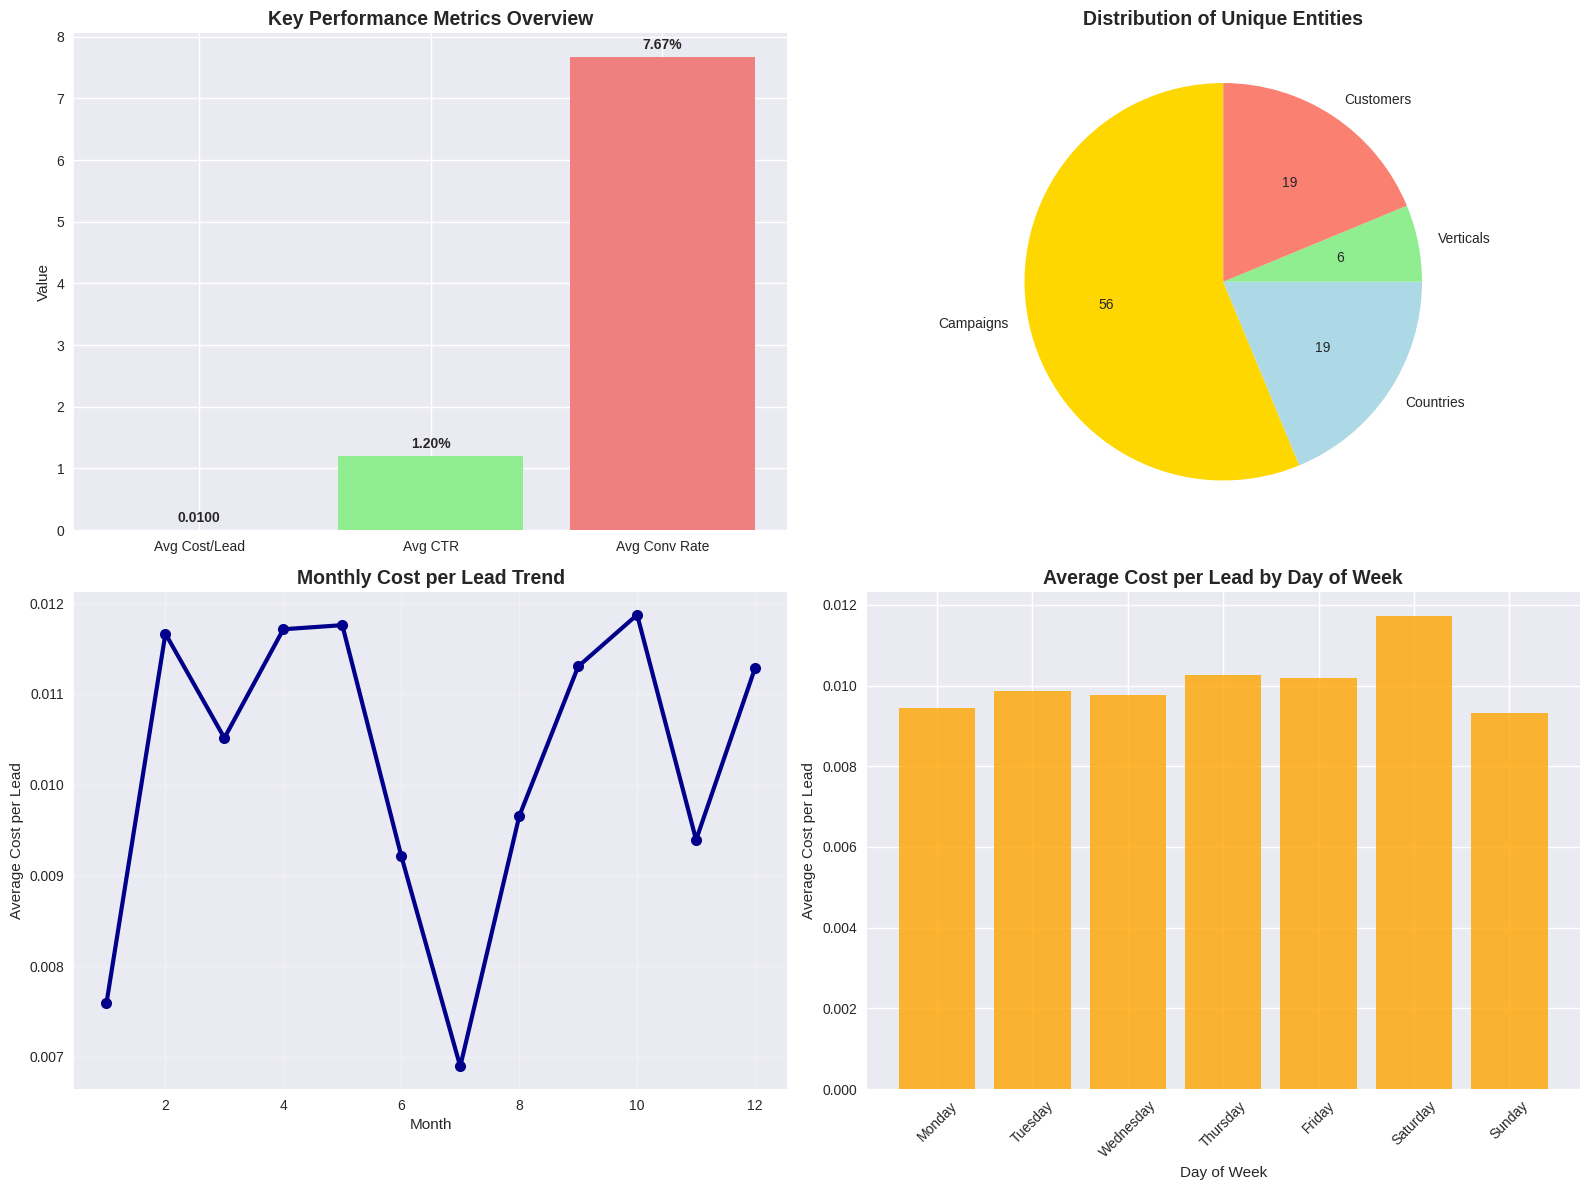

📊 EXECUTIVE SUMMARY
📅 Analysis Period: 2021-06-03 to 2025-10-26
📈 Total Records: 118,337
🎯 Average Cost per Lead: $0.0100
👆 Average Click-Through Rate: 1.20%
🔄 Average Conversion Rate: 7.67%

🏆 TOP PERFORMERS
🥇 Best Campaign: campaign_name_002
🌍 Best Country: country_002
🏢 Best Vertical: vertical_002

📊 PORTFOLIO OVERVIEW
🎯 Unique Campaigns: 18
🌍 Countries Covered: 6
🏢 Verticals: 2
👥 Customers: 6

💡 KEY INSIGHTS & RECOMMENDATIONS
1. 🎯 COST OPTIMIZATION:
   • 8,859 records (7.5%) have high costs (>$0.0138+)
   • Focus on campaigns with efficiency scores > 82.188

2. 📈 CONVERSION IMPROVEMENT:
   • 73.5% of records show zero conversion
   • Investigate and optimize underperforming campaigns

3. ⏰ TIMING OPTIMIZATION:
   • Best performing month: 7 ($0.0069 avg cost)
   • Worst performing month: 10 ($0.0119 avg cost)
   • Best day of week: Sunday ($0.0093 avg cost)
   • Worst day of week: Saturday ($0.0117 avg cost)

4. 🎯 STRATEGIC FOCUS:
   • Prioritize campaigns in vertical_002 vertical
 

In [ ]:
# 10. SUMMARY AND KEY RECOMMENDATIONS
print("10. Executive Summary and Key Findings")
print("="*50)

# Calculate key metrics for summary
total_records = len(data)
date_range = f"{data['date'].min().strftime('%Y-%m-%d')} to {data['date'].max().strftime('%Y-%m-%d')}"
avg_cost_per_lead = data['Cost per Lead_anon'].mean()
avg_ctr = data['Click-Through Rate'].mean()
avg_conversion_rate = data['Conversion Rate'].mean()

unique_campaigns = data['campaign_name_anon'].nunique()
unique_countries = data['country_anon'].nunique()
unique_verticals = data['vertical_anon'].nunique()
unique_customers = data['customer_name_anon'].nunique()

# Best performing entities
best_campaign = campaign_performance.loc[campaign_performance['Cost per Lead_anon_mean'].idxmin(), 'campaign_name_anon']
best_country = country_performance.loc[country_performance['Cost per Lead_anon_mean'].idxmin(), 'country_anon']
best_vertical = vertical_performance.loc[vertical_performance['Cost per Lead_anon_mean'].idxmin(), 'vertical_anon']

# Create summary visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Key metrics overview
metrics_labels = ['Avg Cost/Lead', 'Avg CTR', 'Avg Conv Rate']
metrics_values = [avg_cost_per_lead, avg_ctr * 100, avg_conversion_rate * 100]  # Convert rates to percentages
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = axes[0, 0].bar(metrics_labels, metrics_values, color=colors)
axes[0, 0].set_title('Key Performance Metrics Overview', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Value')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, metrics_values)):
    if i == 0:  # Cost per lead
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metrics_values)*0.01,
                       f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
    else:  # Rates in percentage
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metrics_values)*0.01,
                       f'{value:.2f}%', ha='center', va='bottom', fontweight='bold')

# Volume distribution by category
category_counts = [unique_campaigns, unique_countries, unique_verticals, unique_customers]
category_labels = ['Campaigns', 'Countries', 'Verticals', 'Customers']

axes[0, 1].pie(category_counts, labels=category_labels, autopct='%1.0f', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('Distribution of Unique Entities', fontsize=14, fontweight='bold')

# Monthly performance trend
monthly_trend = data.groupby('month')['Cost per Lead_anon'].mean()
axes[1, 0].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=3, markersize=8, color='darkblue')
axes[1, 0].set_title('Monthly Cost per Lead Trend', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Cost per Lead')
axes[1, 0].grid(True, alpha=0.3)

# Day of week performance
dow_avg = data.groupby('day_of_week_name')['Cost per Lead_anon'].mean()
dow_ordered = dow_avg.reindex([day for day in day_order if day in dow_avg.index])

axes[1, 1].bar(dow_ordered.index, dow_ordered.values, color='orange', alpha=0.8)
axes[1, 1].set_title('Average Cost per Lead by Day of Week', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Cost per Lead')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 EXECUTIVE SUMMARY")
print("="*50)
print(f"📅 Analysis Period: {date_range}")
print(f"📈 Total Records: {total_records:,}")
print(f"🎯 Average Cost per Lead: ${avg_cost_per_lead:.4f}")
print(f"👆 Average Click-Through Rate: {avg_ctr*100:.2f}%")
print(f"🔄 Average Conversion Rate: {avg_conversion_rate*100:.2f}%")

print(f"\n🏆 TOP PERFORMERS")
print("="*50)
print(f"🥇 Best Campaign: {best_campaign}")
print(f"🌍 Best Country: {best_country}")
print(f"🏢 Best Vertical: {best_vertical}")

print(f"\n📊 PORTFOLIO OVERVIEW")
print("="*50)
print(f"🎯 Unique Campaigns: {unique_campaigns}")
print(f"🌍 Countries Covered: {unique_countries}")
print(f"🏢 Verticals: {unique_verticals}")
print(f"👥 Customers: {unique_customers}")

print(f"\n💡 KEY INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate insights
high_cost_threshold = data['Cost per Lead_anon'].quantile(0.8)
high_cost_campaigns = len(data[data['Cost per Lead_anon'] > high_cost_threshold])

zero_conversion_pct = (data['Conversion Rate'] == 0).sum() / len(data) * 100

best_month = monthly_trend.idxmin()
worst_month = monthly_trend.idxmax()

best_day = dow_ordered.idxmin()
worst_day = dow_ordered.idxmax()